# <b>Project Definition</b>

### <b>Domain Background</b>

In the field of instrumental analytical chemistry, there are many techniques for identifying unknown substances. This field is primarily researched for the detection of explosives, drugs and chemical weapons, however, there are many other applications for it. In the healthcare field, researchers are using it to detect cancer and diseases.
Chromatography is a method by which a substance is separated into different components and split across time. For example, if you sample a mixture that is made up of multiple substances you could separate those substances and detect them individually with chromatography. One method of chromatography is using what is called a column. This device is what will separate out the components of a mixture, however, it is extremely slow. It takes minutes to work.

Mass spectrometry is the technique of identifying the chemical structure of a substance by separating ions into differing mass and charge. The three essential components of a mass spectrometer are the ion source, the mass analyzer, and the detector. The ionizer ionizes the sampled substance. The analyzer sorts and separates the ions by mass and charge. The detector measures or counts the separated ions. Ions can be displayed as a histogram of mass-to-charge ratio(m/z) or can be displayed across time to see line curves where the peaks would be where the max quantity of ions were detected. There are many different techniques for each component in performing the identification of substances.


The most popular analytical technique today is ion-mobility spectrometry (IMS). This technique separates and identifies ionized molecules based on their mobility within a carrier gas. It is extremely fast and takes milliseconds to achieve a result, but it is less sensitive than other techniques. This technique is very popular because you can make an IMS device for relative low cost compared to other techniques and the device can be small enough to be hand-held.

The final technique that we will discuss is triple quadrupole mass spectrometry (TQMS). This is a tandem mass spectrometry technique, which just means it has two analyzers. The components in order are the ion source, a quadrupole mass analyzer, a quadrupole that acts as a collision cell to fragment the molecules entering it, a second analyzer that analyzes the resulting fragments, and finally the detector. The quadrupole works by creating an electro-magnetic field that separates the ions and makes them follow a trajectory based on their mass-to-charge ratio (m/z). This technique in theory is the most sensitive and will achieve results in seconds. These devices tend to be very expensive and large. This is the device a team and I are working on.

The above techniques discussed can all be combined to solve problems depending on the application. There are trade-offs that must be made for each technique. Cost and weight are always a major factor. In some cases, the science is not well understood.

### Problem Statement

My team and I are currently working on a triple quad mass spectrometer that is cheaper and smaller so that we can address new markets and applications that TQMS was unable to address previously. Our current instrument displays mass-to-charge ratios over time. We have in the past used peak thresholds to determine what is a detected substance. This technique only gives us an accuracy of 40% with a very high rate of false positives. We are trying to achieve an accuracy of 90% with no more than a 2% false positive rate. We have talked about adding some filtering techniques, but there will be a tradeoff in time and cost. We need to complete our analysis in under 10 seconds. Ideally, we can solve our problem with purely algorithms.

### Data sets and Input

The datasets that will be used in this project were generated from collected samples from our instrument. The instrument was sent out for testing and 12 different substances were tested. The data files we got back are the results from that testing. The datasets are generated from these data files. The datasets have been modified to abstract out any sensitive details such as the substance name and mass pairs. Most importantly the intensities are all generated to mimic the shape of the collected data. The data has also been filtered to remove any malformed data because of a hardware or any other error. There is no proprietary data associated with this project. The model that will be built will need to be re-trained on the actual proprietary dataset to have it work with our instrument. The generated data should be more than adequate in evaluating a model. In most cases, I have between 50 and 80 samples for each substance I am testing for. I realize that this may not be enough, but I am also trying to gauge how many samples will be needed if extending out the substance library. If a compound is performing poorly from lack of samples I will remove it from the test.

Each data file consists of multiple components. First, there will be a mass pair transition id. A mass pair transition consists of an ion charge (+ or -), parent mass, a daughter mass, and collision energy i.e. +123->456(78). The ion charge is from the ion source, the parent mass is from the first quad, the daughter mass is from the third quad and the collision energy is applied at the second quad. Instead of seeing this transition you will see a number 0 to n-1 where n is the total quantity of specified transitions (i.e. n=51). After the id there will be a sample id associated to the dataset, a comment field which will specify if another substance was combined the tested for substance, and what substrate it was sampled on. Substrate could have the value direct, or a harvest code like Perf5. Direct means the substance was inserted into the instrument through a syringe. Direct should be the most stable result. If the substance was harvested off material Perf5 that means the substance was applied to the material and then swiped off with one of our swabs. Theoretically when a substance is harvested it should measure lower ions than direct because you may not of collected the entire amount of the substance. After the substrate field, there will be detection field and an association field. The detection field will have an array of numbers specifying what compounds are detected within that dataset. The association field will specify what mass pairs are associated to which compounds according to our chemist, for example mass pair 1 is associated to compounds [1,3]. After the associated field there will be a height, width, area, and position of the mass pair peak. These values are acquired by applying a smoothing filter to reduce the noise of the signal. Finally, there will be a time series of intensities over a specified number of time steps or scans (i.e. 23). For now, the scan count is fixed to 23, however, in the future it would be better to have scan count be variable in case we want to stop early. So, for each data file you would have that structure per row times the amount of transitions for example 51x33.

In [77]:
#Load datasets
import pandas as pd
import glob, os

os.chdir("./data")

samples = []
count = 0
max_mass_pair_count = 0
for file in glob.glob("*.csv"):
    data_frame = pd.read_csv(file)
    count += 1
    mass_pair_count = len(data_frame)
    max_mass_pair_count = mass_pair_count if mass_pair_count > max_mass_pair_count else max_mass_pair_count
    samples.append(data_frame)
    
os.chdir("..")

merged_data_set = pd.concat(samples, ignore_index=True)

print("Number of Samples: ", count)
print("Max number of mass pairs: ", max_mass_pair_count)


Number of Samples:  641
Max number of mass pairs:  51


In [79]:
#multi detection
display(merged_data_set.head(1))
#single detection
display(samples[10].head(1))
# no detection
display(samples[1].head(1))

mass_pair_id  sample_id           comment substrate       detection  \
0             0      30037  Positive Control      None  [21, 0, 18, 4]   

  association  peak_height  peak_width    peak_area  peak_position  \
0        [10]   477.454417    6.386572  1823.300717           20.0   

      ...       timestep_14  timestep_15  timestep_16  timestep_17  \
0     ...         12.077684    12.398664  1170.550038    13.094119   

   timestep_18  timestep_19  timestep_20  timestep_21  timestep_22  \
0    10.633276     8.600405     5.765087     7.052225    10.963616   

   timestep_23  
0     3.839209  

[1 rows x 33 columns]

mass_pair_id  sample_id comment substrate detection association  \
0             0      30052    None      None       [7]        [10]   

   peak_height  peak_width  peak_area  peak_position     ...       \
0   447.624519    3.221712  999.48066           15.0     ...        

   timestep_14  timestep_15  timestep_16  timestep_17  timestep_18  \
0     0.040866     7.451546     9.563259          0.0     1.164296   

   timestep_19  timestep_20  timestep_21  timestep_22  timestep_23  
0     4.748567          0.0          0.0          0.0     1.431779  

[1 rows x 33 columns]

mass_pair_id  sample_id comment substrate detection association  \
0             0      30038   Blank      None      None        [10]   

   peak_height  peak_width   peak_area  peak_position     ...       \
0   190.374474    2.452172  297.368117            6.0     ...        

   timestep_14  timestep_15  timestep_16  timestep_17  timestep_18  \
0          0.0          0.0          0.0          0.0          0.0   

   timestep_19  timestep_20  timestep_21  timestep_22  timestep_23  
0          0.0          0.0          0.0          0.0          0.0  

[1 rows x 33 columns]

In [80]:
results = (merged_data_set.groupby(['detection']).count()/max_mass_pair_count)['mass_pair_id']

results.index.name = 'Compounds'
results.index = sorted(results.index)
results.name = 'Sample count per compound'

results.round() # in case sample file has extra mass pair

None              11
[10]              58
[13]              68
[14]              36
[15]              68
[18]              77
[19]               4
[21, 0, 18, 4]    75
[21]              79
[22]              79
[3]               19
[7]                9
[8]               58
Name: Sample count per compound, dtype: int64

Compound 7 and 19 do not have enough samples. I will perform data analysis anyways. I will consider dropping later.

## Metrics

### Benchmark Model

The model can only be benchmarked against the previous solution which yields a total accuracy of 40%. Minimum peak height was the only threshold where it was manually set based on internal lab testing. for example, compound 1 could have a minimum height threshold of 1600 ion counts. If the peak signal was below this amount it was deemed noise and ignored. If it was above it would be part of some additional logic that required all associated mass pairs to be above their limits to raise a substance detection alert. Below is most of a confusion matrix, but TNR is missing.

<table>
<thead>
<tr>
<th>Compound ID</th>
<th>TPR</th>
<th>FPR</th>
<th>FNR</th>
</tr>
</thead>
<tbody>
<tr>
<td>Compound 3</td>
<td>5.00%</td>
<td>4.55%</td>
<td>95.00%</td>
</tr>
<tr>
<td>Compound 4</td>
<td>30.34%</td>
<td>52.81%</td>
<td>32.58%</td>
</tr>
<tr>
<td>Compound 7</td>
<td>0.00%</td>
<td>87.50%</td>
<td>12.50%</td>
</tr>
<tr>
<td>Compound 8</td>
<td>13.33%</td>
<td>20.00%</td>
<td>66.67%</td>
</tr>
<tr>
<td>Compound 10</td>
<td>12.31%</td>
<td>7.69%</td>
<td>86.15%</td>
</tr>
<tr>
<td>Compound 13</td>
<td>0.00%</td>
<td>21.21%</td>
<td>84.85%</td>
</tr>
<tr>
<td>Compound 14</td>
<td>5.00%</td>
<td>0.00%</td>
<td>95.00%</td>
</tr>
<tr>
<td>Compound 15</td>
<td>20.37%</td>
<td>12.96%</td>
<td>68.52%</td>
</tr>
<tr>
<td>Compound 18</td>
<td>59.65%</td>
<td>28.95%</td>
<td>14.91%</td>
</tr>
<tr>
<td>Compound 19</td>
<td>20.00%</td>
<td>70.00%</td>
<td>50.00%</td>
</tr>
<tr>
<td>Compound 21</td>
<td>72.90%</td>
<td>26.17%</td>
<td>0.93%</td>
</tr>
<tr>
<td>Compound 22</td>
<td>70.27%</td>
<td>17.12%</td>
<td>15.32%</td>
</tr>
</tbody>
</table>

Accuracy: ~40%

### Evaluation Metrics

To evaluate our models, we should be using a weighted accuracy metric such as fbeta_score and a confusion matrix to see our false positive rate. According to our requirements we could miss a detection 10% of the time if we have a false positive rate below 2%. Since it is more important to be precise than have high recall we should have our beta be a value of 0.5.

## Analysis

### Data Exploration

I need to build a compound to mass pair lookup table in order to find the mass pairs that are important.

In [98]:
import numpy as np
#All samples have the same asssociation per mass pair
#take a sample as input

def string_to_list_of_int(string):
    mod_str = string.replace('[', '').replace(']', '').split(',')
    return list(map(int, mod_str))

compound_to_mass_pair_id = dict()
for i, row in samples[0].iterrows():
    association = string_to_list_of_int(row['association'])
    for compound in association:
        if compound not in compound_to_mass_pair_id:
            compound_to_mass_pair_id[compound] = []
        compound_to_mass_pair_id[compound].append(row['mass_pair_id'])
        
compound_to_mass_pair_id['None'] = np.arange(max_mass_pair_count).tolist()
        
compound_to_mass_pair_id

{10: [0, 3, 4, 19, 20, 22, 23],
 5: [1, 5, 6],
 4: [2, 11],
 19: [7, 8],
 9: [9, 10, 13],
 12: [12, 14, 15],
 7: [16, 18, 27, 30, 46],
 8: [16, 18, 39, 46],
 14: [16, 18, 46],
 16: [17, 48],
 18: [19, 20, 21, 40],
 20: [19, 20],
 3: [20, 47, 49, 50],
 11: [21, 43],
 0: [22, 23, 25, 26, 33, 34],
 2: [22, 23, 25, 26, 33, 34],
 21: [22, 23, 25, 26, 33, 34],
 17: [24, 29, 35],
 6: [28, 31],
 1: [32, 44, 45],
 22: [35, 37, 38],
 15: [36, 39, 46],
 13: [41, 42, 46],
 'None': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50]}

Explore peak properties first. If data ends up being gaussian then we can just use a non-parametric solution. We will need to scale values because they are disproportionate and large across feature columns. I need to see a description of the data by mass pair id to compound so I can determine what features look the most promising.

In [99]:
from sklearn.preprocessing import StandardScaler
peak_properties = ['peak_height', 'peak_width', 'peak_area', 'peak_position']

compounds_to_detection_data_set = merged_data_set.groupby(['detection']).groups
mass_pair_id_to_group_indices = merged_data_set.groupby(['mass_pair_id']).groups

mass_pair_id_to_compound_ids_to_dataset = dict()
for compounds, detection_indices in sorted(compounds_to_detection_data_set.items()):
    if compounds == 'None':
        compound_ids = [compounds]
    else:
        compound_ids = string_to_list_of_int(compounds)
    compound_indices = compounds_to_detection_data_set[compounds]
    for compound in compound_ids:
        for mass_pair_id in compound_to_mass_pair_id[compound]:
            mass_pair_indices = mass_pair_id_to_group_indices[mass_pair_id]
            #intersection of group indices
            intersection_indices = list(set(mass_pair_indices).intersection(set(compound_indices)))
            dataset = merged_data_set.iloc[intersection_indices]
            if mass_pair_id not in mass_pair_id_to_compound_ids_to_dataset:
                mass_pair_id_to_compound_ids_to_dataset[mass_pair_id] = dict()
            if compound not in mass_pair_id_to_compound_ids_to_dataset[mass_pair_id]:
                mass_pair_id_to_compound_ids_to_dataset[mass_pair_id][compound] = dataset
            else:
                pd.concat([mass_pair_id_to_compound_ids_to_dataset[mass_pair_id][compound], dataset])

for mass_pair_id, compound_id_to_dataset in mass_pair_id_to_compound_ids_to_dataset.items():
    for compound_id, dataset in compound_id_to_dataset.items():
        print("Mass pair ID: ", mass_pair_id)  
        print("Compound id: ", compound_id)
        display(dataset[peak_properties].describe())


Mass pair ID:  0
Compound id:  None


peak_height  peak_width    peak_area  peak_position
count    11.000000   11.000000    11.000000      11.000000
mean    234.940496    3.700806   533.462797      16.000000
std     178.269700    2.691080   444.792713       7.113368
min       2.379985    2.452172     7.118355       6.000000
25%     102.579660    2.461720   222.496729      10.000000
50%     250.733474    2.483007   539.619241      17.000000
75%     325.002957    3.847121   751.305072      21.500000
max     561.608179   11.566505  1560.323574      26.000000

Mass pair ID:  0
Compound id:  10


peak_height  peak_width      peak_area  peak_position
count      58.000000   58.000000      58.000000      58.000000
mean    11550.699613    2.947469   24126.172809       9.603448
std     21829.875428    0.466799   45804.076400       3.631923
min       161.671196    2.455954     504.394940       7.000000
25%       775.652289    2.720582    2211.525918       8.000000
50%      3186.260561    2.839728    7821.474898       9.000000
75%     12483.160226    3.170623   24369.551928       9.000000
max    113501.014255    5.594501  235102.816555      24.000000

Mass pair ID:  1
Compound id:  None


peak_height  peak_width     peak_area  peak_position
count    11.000000   11.000000     11.000000      11.000000
mean   2363.787054    9.487534  17808.666433      17.636364
std    1108.622024    5.306985  12143.117444       4.249064
min     842.746288    2.866537   5689.058346      12.000000
25%    1797.003588    4.919846   7794.901324      14.500000
50%    2197.175105   10.600093  15162.857496      17.000000
75%    2707.844822   12.407167  23984.039887      20.000000
max    4542.809693   18.771429  40499.172982      25.000000

Mass pair ID:  2
Compound id:  None


peak_height  peak_width     peak_area  peak_position
count    11.000000   11.000000     11.000000      11.000000
mean    951.838622    4.861866   6106.458300      12.090909
std     639.397461    2.602306   4486.617186       4.678772
min       0.000000    0.000000      0.000000       0.000000
25%     538.841407    3.294622   3673.571779      11.500000
50%     951.462403    5.205574   5629.300107      13.000000
75%    1075.059932    5.956264   7702.006095      15.000000
max    2402.499761    8.971079  17146.800578      18.000000

Mass pair ID:  2
Compound id:  4


peak_height  peak_width     peak_area  peak_position
count  7.500000e+01   75.000000  7.500000e+01      75.000000
mean   1.222119e+06   13.997053  1.020967e+07      14.840000
std    1.428405e+06    2.094582  1.130238e+07       2.922605
min    8.705637e+03    7.493258  8.443583e+04      10.000000
25%    3.823921e+05   12.625422  3.085438e+06      13.000000
50%    8.582706e+05   13.928521  8.009356e+06      14.000000
75%    1.510735e+06   15.546636  1.311979e+07      16.000000
max    7.812279e+06   18.818824  5.996655e+07      24.000000

Mass pair ID:  3
Compound id:  None


peak_height  peak_width    peak_area  peak_position
count    11.000000   11.000000    11.000000      11.000000
mean    313.320067    3.415067   995.789115      16.636364
std     242.390988    1.810471  1033.695612       6.217278
min       3.632646    2.452172    24.769118       6.000000
25%     125.588397    2.460290   201.627542      12.500000
50%     229.474142    2.705301   719.228022      17.000000
75%     526.898233    2.897176  1384.929902      21.000000
max     629.099487    7.962904  3313.963169      26.000000

Mass pair ID:  3
Compound id:  10


peak_height  peak_width     peak_area  peak_position
count     58.000000   58.000000     58.000000      58.000000
mean    2394.239806    4.140446   6999.662056      11.586207
std     3848.098654    2.501450   8324.895862       5.143671
min      232.034191    2.458624    712.747770       7.000000
25%      502.073760    2.811514   2499.255030       8.000000
50%      916.222353    3.017299   4009.936668       9.000000
75%     2155.255170    3.790881   8221.065088      12.750000
max    19697.147224   12.807715  45066.008653      26.000000

Mass pair ID:  4
Compound id:  None


peak_height  peak_width   peak_area  peak_position
count    11.000000   11.000000   11.000000      11.000000
mean     59.094079    6.746956  182.742353      15.000000
std     111.565003    5.555912  253.391221       6.618157
min       1.166880    2.452172    1.912973       7.000000
25%       8.295431    3.082667   49.985679       9.000000
50%      10.786851    4.072140   91.561982      14.000000
75%      14.905140    9.995102  144.281270      19.000000
max     299.615608   20.141771  799.645037      25.000000

Mass pair ID:  4
Compound id:  10


peak_height  peak_width     peak_area  peak_position
count  5.800000e+01   58.000000  5.800000e+01      58.000000
mean   1.742153e+05    2.890880  3.500940e+05       8.551724
std    3.055890e+05    0.180269  6.201140e+05       1.778748
min    3.250899e+02    2.453575  7.748027e+02       7.000000
25%    9.616824e+03    2.802679  2.036929e+04       8.000000
50%    4.689655e+04    2.892822  9.500289e+04       8.000000
75%    1.902662e+05    2.970350  3.593384e+05       9.000000
max    1.440630e+06    3.353485  2.892788e+06      21.000000

Mass pair ID:  5
Compound id:  None


peak_height  peak_width    peak_area  peak_position
count    11.000000   11.000000    11.000000      11.000000
mean    571.978842    5.039926  2425.671927      18.272727
std     347.710778    5.275152  1917.586878       6.451216
min      16.295090    2.452172   191.998106      10.000000
25%     352.960436    2.791503   745.282710      12.500000
50%     469.482576    3.019042  1278.443082      18.000000
75%     900.286644    3.283829  4247.081283      23.500000
max    1070.172728   19.770306  5173.913760      27.000000

Mass pair ID:  6
Compound id:  None


peak_height  peak_width    peak_area  peak_position
count    11.000000   11.000000    11.000000      11.000000
mean    452.083080    3.168371  1662.587965      16.454545
std     222.943329    1.102205  1084.320737       4.761589
min       1.605706    2.459486     4.309620       9.000000
25%     316.301893    2.560770   783.340345      13.000000
50%     465.454188    2.835761  1803.964468      18.000000
75%     618.558899    2.932807  2350.501729      19.500000
max     761.641327    6.054081  3435.080531      23.000000

Mass pair ID:  7
Compound id:  None


peak_height  peak_width    peak_area  peak_position
count    11.000000   11.000000    11.000000      11.000000
mean    357.011813    3.667095  1821.878877      16.363636
std     151.902056    2.495552  1162.109429       6.859632
min      93.459405    2.452172   144.104371       6.000000
25%     284.696506    2.476556   810.770231      11.000000
50%     346.278518    2.513917  1923.199316      17.000000
75%     464.906708    3.621933  2360.583519      20.500000
max     638.586566   10.876689  4012.388856      27.000000

Mass pair ID:  7
Compound id:  19


peak_height  peak_width     peak_area  peak_position
count       4.000000    4.000000  4.000000e+00       4.000000
mean   543430.037354    9.375763  3.378096e+06       9.250000
std    219256.562660    2.159290  1.378049e+06       0.957427
min    290126.344881    7.806395  1.687921e+06       8.000000
25%    441122.107843    8.190122  2.634308e+06       8.750000
50%    531755.701796    8.571265  3.466379e+06       9.500000
75%    634063.631307    9.756907  4.210167e+06      10.000000
max    820082.400943   12.554128  4.891705e+06      10.000000

Mass pair ID:  8
Compound id:  None


peak_height  peak_width    peak_area  peak_position
count    11.000000   11.000000    11.000000      11.000000
mean    465.340314    3.728422  2044.259113      15.636364
std     350.917148    2.093921  2020.146113       7.671672
min      28.119554    2.452172    45.769394       7.000000
25%     223.883067    2.452172   433.395339       9.000000
50%     356.539530    2.877367  1566.103156      15.000000
75%     805.382480    3.484297  3043.373814      24.500000
max    1003.842495    8.418199  5611.150203      25.000000

Mass pair ID:  8
Compound id:  19


peak_height  peak_width     peak_area  peak_position
count       4.000000    4.000000  4.000000e+00       4.000000
mean   200977.214796    9.386097  1.246179e+06       9.250000
std     77478.346994    2.103321  5.000883e+05       0.957427
min    111684.718303    7.812197  6.478259e+05       8.000000
25%    165794.922701    8.351683  9.579853e+05       8.750000
50%    196438.982690    8.622817  1.269398e+06       9.500000
75%    231621.274786    9.657231  1.557592e+06      10.000000
max    299346.175503   12.486556  1.798094e+06      10.000000

Mass pair ID:  9
Compound id:  None


peak_height  peak_width  peak_area  peak_position
count    11.000000   11.000000  11.000000      11.000000
mean      4.156536    3.380053  29.783038      12.090909
std       3.302012    2.179167  26.368118       8.030623
min       0.000000    0.000000   0.000000       0.000000
25%       1.529371    2.820524   4.387069       8.000000
50%       4.263488    3.121056  31.170945      12.000000
75%       6.688590    4.458590  51.297533      17.500000
max       8.965068    6.568518  72.475846      25.000000

Mass pair ID:  10
Compound id:  None


peak_height  peak_width    peak_area  peak_position
count    11.000000   11.000000    11.000000      11.000000
mean    240.423359    3.563522   612.096377      18.545455
std     186.376014    2.159509   452.044250       5.922223
min       6.449752    2.452718    37.854846       6.000000
25%      60.059997    2.517496   155.114730      16.000000
50%     279.204881    2.736797   689.491894      19.000000
75%     373.963295    3.343109   890.921114      22.500000
max     549.762113    9.769774  1251.762244      26.000000

Mass pair ID:  11
Compound id:  None


peak_height  peak_width   peak_area  peak_position
count    11.000000   11.000000   11.000000      11.000000
mean     79.600100    3.951955  183.215575      12.727273
std      92.027226    2.913355  199.517756       5.569397
min       1.188490    2.452172    3.887741       6.000000
25%       5.385999    2.493935   39.636569       8.000000
50%      59.045544    2.663867  121.366790      13.000000
75%     117.103121    3.499229  250.144076      17.000000
max     246.165709   12.062749  575.163954      22.000000

Mass pair ID:  11
Compound id:  4


peak_height  peak_width     peak_area  peak_position
count  7.500000e+01   75.000000  7.500000e+01      75.000000
mean   7.515866e+06    7.500856  3.112777e+07      10.120000
std    1.472584e+07    2.938236  5.451120e+07       1.770326
min    3.171780e+03    3.684442  3.070851e+04       8.000000
25%    3.178175e+05    5.295238  2.092234e+06       9.000000
50%    1.584894e+06    6.866681  9.854158e+06      10.000000
75%    7.409986e+06    8.685017  3.479238e+07      11.000000
max    8.349197e+07   18.100199  3.101983e+08      16.000000

Mass pair ID:  12
Compound id:  None


peak_height  peak_width   peak_area  peak_position
count    11.000000   11.000000   11.000000      11.000000
mean      6.133004    4.101259   40.548903      15.636364
std       3.937144    2.544042   34.534460       7.813741
min       0.000000    0.000000    0.000000       0.000000
25%       3.265078    2.629230   16.710752      12.000000
50%       6.940924    3.521829   39.078881      15.000000
75%       8.514873    5.270761   54.843333      21.500000
max      13.310778    8.334884  113.452621      27.000000

Mass pair ID:  13
Compound id:  None


peak_height  peak_width  peak_area  peak_position
count    11.000000   11.000000  11.000000      11.000000
mean      4.172853    3.927003  25.898482      12.727273
std       2.582232    2.302248  19.383467       7.390411
min       0.000000    0.000000   0.000000       0.000000
25%       3.193103    2.458306  17.796947       9.500000
50%       3.505622    3.688462  21.186357      12.000000
75%       5.266547    5.400645  33.658731      15.500000
max      10.018223    7.576066  63.590996      26.000000

Mass pair ID:  14
Compound id:  None


peak_height  peak_width   peak_area  peak_position
count    11.000000   11.000000   11.000000      11.000000
mean     11.500314    4.572875   45.631707      14.454545
std      25.134281    5.565303   65.578148       8.937154
min       0.000000    0.000000    0.000000       0.000000
25%       1.770021    2.452172    4.751213       9.500000
50%       2.030088    2.807826   13.563053      18.000000
75%       7.310440    4.433148   65.467035      20.500000
max      86.045592   19.813167  169.798022      26.000000

Mass pair ID:  15
Compound id:  None


peak_height  peak_width   peak_area  peak_position
count    11.000000   11.000000   11.000000      11.000000
mean     11.319711    6.416991   51.034654      14.000000
std      21.410318    6.032979   68.617315       7.099296
min       0.000000    0.000000    0.000000       0.000000
25%       2.170844    3.068412   10.956163       9.500000
50%       3.976815    4.222075   15.143687      17.000000
75%       6.265333    8.205915   47.225379      18.000000
max      74.032811   21.204803  215.965916      24.000000

Mass pair ID:  16
Compound id:  None


peak_height  peak_width     peak_area  peak_position
count      11.000000   11.000000  1.100000e+01      11.000000
mean   249955.405382    3.696357  1.586215e+06      10.181818
std    207407.508814    2.976288  1.520852e+06       7.639610
min         0.000000    0.000000  0.000000e+00       0.000000
25%     54304.597825    1.406963  1.387145e+05       4.000000
50%    248168.820959    3.489869  1.646280e+06      11.000000
75%    407288.210036    5.242093  2.473309e+06      16.500000
max    578397.776922    8.822333  4.083645e+06      21.000000

Mass pair ID:  16
Compound id:  14


peak_height  peak_width     peak_area  peak_position
count  3.600000e+01   36.000000  3.600000e+01      36.000000
mean   2.967178e+06    9.655698  2.595272e+07      10.500000
std    2.819156e+06    4.850498  2.760304e+07       2.677952
min    1.810196e+05    2.944458  4.267900e+05       7.000000
25%    4.159634e+05    5.107734  1.637275e+06       8.000000
50%    2.086791e+06   10.485256  1.710200e+07      10.000000
75%    5.324451e+06   14.530156  4.244696e+07      12.250000
max    8.509852e+06   18.390611  8.495161e+07      17.000000

Mass pair ID:  16
Compound id:  7


peak_height  peak_width     peak_area  peak_position
count  9.000000e+00    9.000000  9.000000e+00       9.000000
mean   6.386698e+07    4.442566  2.240194e+08       7.555556
std    2.711744e+07    0.753150  1.149507e+08       0.881917
min    1.263006e+07    2.614652  2.144087e+07       6.000000
25%    5.019006e+07    4.545878  1.668317e+08       7.000000
50%    6.700041e+07    4.690279  2.223790e+08       8.000000
75%    7.976908e+07    4.842519  2.842765e+08       8.000000
max    1.058004e+08    5.091974  4.285697e+08       9.000000

Mass pair ID:  16
Compound id:  8


peak_height  peak_width     peak_area  peak_position
count  5.800000e+01   58.000000  5.800000e+01      58.000000
mean   1.568260e+06    8.571021  1.052365e+07       9.000000
std    9.014707e+05    4.055719  7.738931e+06       2.008753
min    3.377495e+05    2.665711  8.617611e+05       6.000000
25%    9.950637e+05    6.220393  5.195725e+06       8.000000
50%    1.290840e+06    8.170008  8.201630e+06       9.000000
75%    1.887694e+06   10.757524  1.359228e+07       9.750000
max    4.148422e+06   20.296718  3.221484e+07      21.000000

Mass pair ID:  17
Compound id:  None


peak_height  peak_width      peak_area  peak_position
count     11.000000   11.000000      11.000000      11.000000
mean   12722.959555    6.739786   96449.996674      12.363636
std    18948.599051    6.048483  156199.828498       4.863594
min      830.980158    2.456530    2344.933756       6.000000
25%     2953.545390    2.681917    9761.092367       9.000000
50%     5543.531102    3.284635   23020.549148      11.000000
75%    12849.053737    9.197785  108015.028190      14.000000
max    67421.892658   20.245991  527913.769157      21.000000

Mass pair ID:  18
Compound id:  None


peak_height  peak_width     peak_area  peak_position
count      11.000000   11.000000  1.100000e+01      11.000000
mean    88058.774746    5.608608  5.845687e+05      13.000000
std     83817.436613    3.804048  7.051392e+05       5.118594
min      9383.967334    2.452172  2.973038e+04       7.000000
25%     33577.011157    3.126339  9.672783e+04       9.000000
50%     79196.566101    3.651548  3.275001e+05      12.000000
75%    106994.222267    8.018757  8.028015e+05      18.000000
max    307012.246670   12.553031  2.230016e+06      21.000000

Mass pair ID:  18
Compound id:  14


peak_height  peak_width     peak_area  peak_position
count  3.600000e+01   36.000000  3.600000e+01      36.000000
mean   7.407487e+05   11.658412  6.313986e+06      10.527778
std    5.427309e+05    4.787521  4.839979e+06       1.539687
min    1.177058e+05    4.994515  3.953604e+05       9.000000
25%    2.304957e+05    7.708109  1.799347e+06      10.000000
50%    6.735404e+05    9.927625  5.961629e+06      10.000000
75%    1.302438e+06   16.695908  1.077006e+07      11.000000
max    1.806910e+06   20.288940  1.447994e+07      16.000000

Mass pair ID:  18
Compound id:  7


peak_height  peak_width     peak_area  peak_position
count  9.000000e+00    9.000000  9.000000e+00       9.000000
mean   2.131112e+07    4.074560  6.625707e+07       7.777778
std    9.272220e+06    0.555329  3.037827e+07       0.833333
min    9.669997e+06    3.147055  2.071504e+07       6.000000
25%    1.609312e+07    3.885655  5.402813e+07       8.000000
50%    2.185067e+07    3.984346  6.569613e+07       8.000000
75%    2.233894e+07    4.347974  6.898221e+07       8.000000
max    4.219839e+07    5.168316  1.350991e+08       9.000000

Mass pair ID:  18
Compound id:  8


peak_height  peak_width     peak_area  peak_position
count  5.800000e+01   58.000000  5.800000e+01      58.000000
mean   4.994707e+05    5.435087  2.272742e+06      10.275862
std    3.487154e+05    3.417836  1.765104e+06       5.369809
min    4.092446e+04    2.452172  6.380462e+04       6.000000
25%    2.852682e+05    3.192881  9.139663e+05       7.000000
50%    3.539890e+05    4.068656  1.847894e+06       8.000000
75%    7.015402e+05    6.353337  3.037407e+06      10.000000
max    1.807145e+06   19.590298  7.865656e+06      26.000000

Mass pair ID:  19
Compound id:  None


peak_height  peak_width      peak_area  peak_position
count      11.000000   11.000000      11.000000      11.000000
mean    24516.945432    4.870859  155609.184110      12.363636
std     32828.791116    2.820467  242792.380552       4.410731
min      1815.436801    2.452172    2972.918660       8.000000
25%      6783.415063    2.575517   23072.761467       9.000000
50%      8932.459204    3.088513   31491.854795      11.000000
75%     26505.746576    6.600082  189593.544281      14.000000
max    112570.323302   10.453597  803429.766257      21.000000

Mass pair ID:  19
Compound id:  10


peak_height  peak_width     peak_area  peak_position
count      58.000000   58.000000  5.800000e+01      58.000000
mean   238325.187990   16.009649  2.289077e+06      13.982759
std    174618.152315    2.921640  1.735561e+06       2.180386
min     64452.321976    4.779604  2.917099e+05      10.000000
25%    112212.857879   15.351717  1.080122e+06      12.250000
50%    188460.019654   16.914432  1.835375e+06      14.000000
75%    295991.989626   17.828319  2.873823e+06      16.000000
max    914635.753165   19.432612  8.986503e+06      19.000000

Mass pair ID:  19
Compound id:  18


peak_height  peak_width     peak_area  peak_position
count  7.700000e+01   77.000000  7.700000e+01      77.000000
mean   4.500833e+05   14.873896  4.342824e+06      12.194805
std    3.001051e+05    2.898284  3.042522e+06       2.924664
min    9.256844e+04    4.805308  8.313043e+05       8.000000
25%    1.815022e+05   12.822405  1.569147e+06      10.000000
50%    4.252968e+05   14.612173  4.104781e+06      12.000000
75%    6.289710e+05   17.372039  6.010935e+06      14.000000
max    1.336757e+06   20.349248  1.314185e+07      20.000000

Mass pair ID:  20
Compound id:  None


peak_height  peak_width      peak_area  peak_position
count      11.000000   11.000000      11.000000      11.000000
mean    59751.952177    5.586210  285743.993263      11.090909
std     49302.947721    3.299578  248305.297732       4.437444
min      9474.302202    2.452704   23419.615723       6.000000
25%     19216.904478    2.743570   35860.083002       9.000000
50%     41628.303226    5.215981  243552.721096       9.000000
75%     87150.600726    6.564780  526847.663689      13.000000
max    148784.284963   12.168184  627470.800865      22.000000

Mass pair ID:  20
Compound id:  10


peak_height  peak_width     peak_area  peak_position
count  5.800000e+01   58.000000  5.800000e+01      58.000000
mean   8.359452e+05   13.821371  7.683963e+06      12.758621
std    3.907607e+05    3.811914  4.129399e+06       2.258010
min    2.108817e+05    2.682328  1.260363e+06       8.000000
25%    4.933464e+05   11.940673  4.369941e+06      11.250000
50%    7.920441e+05   15.023460  7.253584e+06      13.000000
75%    1.069611e+06   16.414408  9.704602e+06      14.000000
max    1.892119e+06   19.280642  2.127938e+07      21.000000

Mass pair ID:  20
Compound id:  18


peak_height  peak_width     peak_area  peak_position
count  7.700000e+01   77.000000  7.700000e+01      77.000000
mean   1.440345e+06   13.327914  1.262571e+07      10.597403
std    9.455875e+05    4.503466  8.789226e+06       3.746085
min    3.516594e+05    2.452172  5.510971e+05       6.000000
25%    8.160628e+05   10.680999  6.548030e+06       7.000000
50%    1.145098e+06   13.614981  1.072457e+07      10.000000
75%    1.826460e+06   16.840379  1.566395e+07      14.000000
max    4.432742e+06   21.024457  4.391625e+07      20.000000

Mass pair ID:  20
Compound id:  3


peak_height  peak_width     peak_area  peak_position
count  1.900000e+01   19.000000  1.900000e+01      19.000000
mean   2.193434e+06   17.053593  2.290557e+07      15.473684
std    8.207494e+05    2.232246  9.562938e+06       1.866917
min    8.631663e+05   12.193839  8.194749e+06      11.000000
25%    1.671582e+06   16.323010  1.654642e+07      15.000000
50%    2.055549e+06   17.975483  2.277465e+07      16.000000
75%    2.483129e+06   18.434493  2.585585e+07      16.000000
max    3.869061e+06   19.762986  4.297130e+07      20.000000

Mass pair ID:  21
Compound id:  None


peak_height  peak_width     peak_area  peak_position
count    11.000000   11.000000     11.000000      11.000000
mean   1268.005356    5.025976   8679.663482      17.090909
std     871.168875    2.383643   6563.256591       5.855844
min     287.517959    2.482740    622.894767       7.000000
25%     668.226648    3.520789   4793.028561      14.000000
50%    1028.965767    4.617311   8373.008717      18.000000
75%    1601.050313    5.982252  11114.371326      20.500000
max    3259.992632   10.710761  23714.550946      26.000000

Mass pair ID:  21
Compound id:  18


peak_height  peak_width     peak_area  peak_position
count  7.700000e+01   77.000000  7.700000e+01      77.000000
mean   2.644991e+07    7.047426  1.419906e+08       9.454545
std    4.675379e+07    1.546539  2.756235e+08       1.153318
min    1.460428e+05    3.789931  8.422742e+05       7.000000
25%    3.298240e+06    6.149662  2.063189e+07       9.000000
50%    1.013254e+07    7.140363  5.175609e+07       9.000000
75%    2.622139e+07    8.112010  1.226810e+08      10.000000
max    2.565351e+08   10.313661  1.548351e+09      13.000000

Mass pair ID:  22
Compound id:  None


peak_height  peak_width     peak_area  peak_position
count    11.000000   11.000000     11.000000      11.000000
mean   2972.944772    6.888020  20818.883048      16.818182
std    1776.273972    4.277357  14968.882825       5.946733
min     309.147154    2.453828    723.057996       8.000000
25%    1664.748347    4.255732   8107.425953      12.500000
50%    3197.614188    5.870485  19170.539307      15.000000
75%    3701.581482    8.361460  29392.218771      21.500000
max    6164.566286   15.331662  43722.654132      27.000000

Mass pair ID:  22
Compound id:  10


peak_height  peak_width      peak_area  peak_position
count     58.000000   58.000000      58.000000      58.000000
mean   15696.730143   14.087742  142394.828796      13.948276
std    15473.835113    4.833405  138022.763871       3.153513
min     1043.711684    2.452172    1712.453602       9.000000
25%     5610.438808   11.152749   49184.186388      12.000000
50%    11675.379819   16.193612  114296.201832      14.000000
75%    19781.314218   17.743308  160401.962199      15.750000
max    74305.062501   20.480615  721414.980455      25.000000

Mass pair ID:  22
Compound id:  21


peak_height  peak_width     peak_area  peak_position
count  7.500000e+01   75.000000  7.500000e+01      75.000000
mean   1.444380e+07   10.603888  9.876014e+07      10.800000
std    1.578353e+07    2.469346  1.058380e+08       1.345664
min    9.284946e+05    3.244526  8.430021e+06       7.000000
25%    3.301311e+06    9.315620  2.459569e+07      10.000000
50%    7.653294e+06   10.188289  5.683974e+07      11.000000
75%    2.050206e+07   11.560455  1.419985e+08      12.000000
max    7.097164e+07   18.226236  4.819534e+08      13.000000

Mass pair ID:  22
Compound id:  0


peak_height  peak_width     peak_area  peak_position
count  7.500000e+01   75.000000  7.500000e+01      75.000000
mean   1.444380e+07   10.603888  9.876014e+07      10.800000
std    1.578353e+07    2.469346  1.058380e+08       1.345664
min    9.284946e+05    3.244526  8.430021e+06       7.000000
25%    3.301311e+06    9.315620  2.459569e+07      10.000000
50%    7.653294e+06   10.188289  5.683974e+07      11.000000
75%    2.050206e+07   11.560455  1.419985e+08      12.000000
max    7.097164e+07   18.226236  4.819534e+08      13.000000

Mass pair ID:  23
Compound id:  None


peak_height  peak_width     peak_area  peak_position
count    11.000000   11.000000     11.000000      11.000000
mean   3327.053343    5.880893  25273.630138      13.636364
std    1832.976611    4.957817  19082.191238       5.005452
min     526.674926    2.452172    856.442307       7.000000
25%    2037.926178    3.103991  12322.755488      10.000000
50%    3581.313953    3.749038  21447.829169      14.000000
75%    4120.801047    6.305267  37452.821205      15.500000
max    6952.846965   18.585675  61863.783259      25.000000

Mass pair ID:  23
Compound id:  10


peak_height  peak_width     peak_area  peak_position
count      58.000000   58.000000  5.800000e+01      58.000000
mean    25370.274000   13.998901  2.242074e+05      13.586207
std     29135.985606    4.361335  2.436490e+05       2.896062
min       846.791729    3.625504  2.464041e+03       9.000000
25%      6407.660702   11.940023  6.022572e+04      11.250000
50%     14117.210769   15.610128  1.270292e+05      13.000000
75%     28319.703420   17.310880  2.807710e+05      15.750000
max    133108.091594   19.407040  1.176443e+06      21.000000

Mass pair ID:  23
Compound id:  21


peak_height  peak_width     peak_area  peak_position
count  7.500000e+01   75.000000  7.500000e+01      75.000000
mean   2.565019e+07   10.396420  1.742665e+08      10.786667
std    2.824773e+07    2.358097  1.872478e+08       1.358590
min    1.150850e+06    3.543507  1.075233e+07       7.000000
25%    6.310968e+06    9.081648  4.242180e+07      10.000000
50%    1.395869e+07   10.056657  1.003047e+08      11.000000
75%    3.548005e+07   11.292125  2.479950e+08      12.000000
max    1.325394e+08   18.057834  8.945906e+08      13.000000

Mass pair ID:  23
Compound id:  0


peak_height  peak_width     peak_area  peak_position
count  7.500000e+01   75.000000  7.500000e+01      75.000000
mean   2.565019e+07   10.396420  1.742665e+08      10.786667
std    2.824773e+07    2.358097  1.872478e+08       1.358590
min    1.150850e+06    3.543507  1.075233e+07       7.000000
25%    6.310968e+06    9.081648  4.242180e+07      10.000000
50%    1.395869e+07   10.056657  1.003047e+08      11.000000
75%    3.548005e+07   11.292125  2.479950e+08      12.000000
max    1.325394e+08   18.057834  8.945906e+08      13.000000

Mass pair ID:  24
Compound id:  None


peak_height  peak_width     peak_area  peak_position
count    11.000000   11.000000     11.000000      11.000000
mean   3382.936282    4.491350  20317.325079      18.272727
std    1817.216162    1.916882  14234.863273       7.590664
min     938.431843    2.452172   2119.302933       7.000000
25%    1737.350726    3.453775   6545.310115      11.000000
50%    3552.822764    4.192786  20070.988138      21.000000
75%    4499.655343    4.852915  30173.386209      24.500000
max    6044.402064    8.915574  41053.846962      27.000000

Mass pair ID:  25
Compound id:  None


peak_height  peak_width     peak_area  peak_position
count    11.000000   11.000000     11.000000      11.000000
mean    975.918607    4.342575   5999.921183      14.272727
std     565.232420    2.103008   5445.722398       6.754123
min     180.407200    2.452217    554.446638       6.000000
25%     419.151322    2.634276   1537.942857       8.500000
50%    1061.157768    4.057335   4087.616778      14.000000
75%    1404.005737    5.058955   9758.781863      19.500000
max    1811.970302    9.417211  16063.104080      24.000000

Mass pair ID:  25
Compound id:  21


peak_height  peak_width     peak_area  peak_position
count      75.000000   75.000000  7.500000e+01      75.000000
mean    94315.080374   11.644450  7.209953e+05      11.800000
std    115201.480679    2.837105  8.690179e+05       1.938235
min      4353.885171    4.222570  3.110520e+04       7.000000
25%     24646.179078    9.768227  1.995947e+05      11.000000
50%     61761.264751   11.424587  4.613269e+05      12.000000
75%    108360.361007   13.293318  7.780573e+05      13.000000
max    549874.592688   19.142943  4.456880e+06      18.000000

Mass pair ID:  25
Compound id:  0


peak_height  peak_width     peak_area  peak_position
count      75.000000   75.000000  7.500000e+01      75.000000
mean    94315.080374   11.644450  7.209953e+05      11.800000
std    115201.480679    2.837105  8.690179e+05       1.938235
min      4353.885171    4.222570  3.110520e+04       7.000000
25%     24646.179078    9.768227  1.995947e+05      11.000000
50%     61761.264751   11.424587  4.613269e+05      12.000000
75%    108360.361007   13.293318  7.780573e+05      13.000000
max    549874.592688   19.142943  4.456880e+06      18.000000

Mass pair ID:  26
Compound id:  None


peak_height  peak_width     peak_area  peak_position
count    11.000000   11.000000     11.000000      11.000000
mean   1048.566544    5.765053   7576.241805      14.090909
std     459.911620    3.427399   4516.657423       4.867331
min     184.930988    2.452172    302.378933       8.000000
25%     984.527117    3.148220   4987.232464      10.000000
50%    1038.819860    4.582244   7108.904952      15.000000
75%    1080.107572    8.330461   9439.545255      17.500000
max    2047.917479   11.236928  17999.285360      22.000000

Mass pair ID:  26
Compound id:  21


peak_height  peak_width     peak_area  peak_position
count  7.500000e+01   75.000000  7.500000e+01      75.000000
mean   1.168362e+06   12.336882  9.474680e+06      10.760000
std    9.517988e+05    3.165150  7.172560e+06       2.222976
min    1.106145e+05    4.699291  6.726277e+05       7.000000
25%    4.955451e+05   10.086163  4.013653e+06       9.000000
50%    9.732959e+05   12.379334  8.177752e+06      11.000000
75%    1.389312e+06   14.060296  1.265702e+07      12.000000
max    4.814959e+06   19.953618  3.552369e+07      15.000000

Mass pair ID:  26
Compound id:  0


peak_height  peak_width     peak_area  peak_position
count  7.500000e+01   75.000000  7.500000e+01      75.000000
mean   1.168362e+06   12.336882  9.474680e+06      10.760000
std    9.517988e+05    3.165150  7.172560e+06       2.222976
min    1.106145e+05    4.699291  6.726277e+05       7.000000
25%    4.955451e+05   10.086163  4.013653e+06       9.000000
50%    9.732959e+05   12.379334  8.177752e+06      11.000000
75%    1.389312e+06   14.060296  1.265702e+07      12.000000
max    4.814959e+06   19.953618  3.552369e+07      15.000000

Mass pair ID:  27
Compound id:  None


peak_height  peak_width     peak_area  peak_position
count    11.000000   11.000000     11.000000      11.000000
mean   2620.136554    4.553169  14835.888420      13.363636
std    2293.810109    1.980663  13975.679433       7.645557
min     117.611957    2.452172    165.883598       6.000000
25%    1241.967093    3.057213   5006.448529       8.000000
50%    2136.795922    3.832831  10440.741689       9.000000
75%    3062.954237    5.766970  21834.639688      20.000000
max    8463.231723    8.569357  48076.971926      27.000000

Mass pair ID:  27
Compound id:  7


peak_height  peak_width     peak_area  peak_position
count  9.000000e+00    9.000000  9.000000e+00       9.000000
mean   2.464817e+06    3.207022  6.666297e+06       6.111111
std    2.098921e+06    1.367518  5.383723e+06       2.472066
min    0.000000e+00    0.000000  0.000000e+00       0.000000
25%    1.834979e+06    3.100628  4.427083e+06       6.000000
50%    2.667438e+06    3.641777  6.910033e+06       7.000000
75%    2.683250e+06    3.774765  7.818847e+06       7.000000
max    7.175240e+06    4.750191  1.795843e+07       9.000000

Mass pair ID:  28
Compound id:  None


peak_height  peak_width    peak_area  peak_position
count    11.000000   11.000000    11.000000      11.000000
mean    612.602144    2.909557  2174.775036      16.818182
std     143.955837    0.501246   561.767013       5.036232
min     434.611844    2.452350  1063.779895       9.000000
25%     523.190696    2.543054  1846.127285      14.000000
50%     567.525685    2.719497  2039.153333      17.000000
75%     663.910841    3.174599  2628.894854      18.000000
max     908.307340    4.056495  2911.294445      26.000000

Mass pair ID:  29
Compound id:  None


peak_height  peak_width     peak_area  peak_position
count    11.000000   11.000000     11.000000      11.000000
mean   1133.177333    4.266772   6050.307356      13.636364
std     731.137024    2.329024   5203.333209       6.500350
min     359.701243    2.452172    698.710675       7.000000
25%     543.999701    2.459803   2270.693395       9.000000
50%     985.238903    3.764708   3974.548470      13.000000
75%    1518.533713    5.128328   9505.371222      17.000000
max    2738.910377    9.679350  15463.285320      26.000000

Mass pair ID:  30
Compound id:  None


peak_height  peak_width     peak_area  peak_position
count    11.000000   11.000000     11.000000      11.000000
mean   1696.871406    6.346554  12085.177081      15.636364
std    1208.772214    3.698934  11429.102271       5.643983
min     262.611151    2.452288    696.405135       7.000000
25%     940.082166    3.391212   3614.115422      11.000000
50%    1281.751954    5.762809   8782.963739      17.000000
75%    2323.143366    8.738806  16553.540379      19.000000
max    4316.977133   12.815179  36720.775477      25.000000

Mass pair ID:  30
Compound id:  7


peak_height  peak_width     peak_area  peak_position
count  9.000000e+00    9.000000  9.000000e+00       9.000000
mean   8.349561e+06    3.456697  2.049160e+07       7.444444
std    6.201945e+06    0.453589  1.492183e+07       0.881917
min    1.153164e+06    2.452172  1.795627e+06       6.000000
25%    6.297880e+06    3.327699  1.410858e+07       7.000000
50%    6.799035e+06    3.628134  1.737124e+07       7.000000
75%    8.468356e+06    3.705811  2.179522e+07       8.000000
max    2.375689e+07    3.902693  5.671965e+07       9.000000

Mass pair ID:  31
Compound id:  None


peak_height  peak_width     peak_area  peak_position
count    11.000000   11.000000     11.000000      11.000000
mean   1747.966780    4.245090  11029.701548      16.545455
std    1165.453397    2.256065   9791.131357       6.121497
min      93.545643    2.452172    211.024820       6.000000
25%     788.950530    2.626064   2838.681073      13.500000
50%    2374.243256    3.727023   8150.993430      19.000000
75%    2707.540890    4.634925  18781.710550      20.500000
max    3061.974530    9.398409  26682.768389      24.000000

Mass pair ID:  32
Compound id:  None


peak_height  peak_width    peak_area  peak_position
count    11.000000   11.000000    11.000000      11.000000
mean   1054.607691    3.158199  4687.407154      13.090909
std     501.435235    1.522979  3208.673767       6.920326
min       0.000000    0.000000     0.000000       0.000000
25%     847.398282    2.504038  2923.544022       8.500000
50%    1258.202562    3.128886  4322.303493      14.000000
75%    1361.945646    3.663490  6801.901392      18.000000
max    1691.632974    6.146769  9774.646033      24.000000

Mass pair ID:  33
Compound id:  None


peak_height  peak_width     peak_area  peak_position
count    11.000000   11.000000     11.000000      11.000000
mean   1794.061593    6.079697  11980.789226      18.545455
std    1087.213498    5.151756  10348.723910       8.214178
min       0.000000    0.000000      0.000000       0.000000
25%    1113.163749    2.452192   2623.554215      14.500000
50%    2065.965798    4.343231  12962.665607      22.000000
75%    2298.744963    7.606282  15307.492574      24.000000
max    3902.340834   15.434741  34973.246917      26.000000

Mass pair ID:  33
Compound id:  21


peak_height  peak_width     peak_area  peak_position
count  7.500000e+01   75.000000  7.500000e+01      75.000000
mean   6.750094e+06   11.593263  5.016115e+07      11.080000
std    8.305578e+06    2.465544  5.773102e+07       1.642016
min    5.170656e+05    7.145901  4.517552e+06       7.000000
25%    1.605405e+06    9.914963  1.207827e+07      10.000000
50%    4.109278e+06   11.131732  3.202821e+07      11.000000
75%    8.801113e+06   12.968005  6.150206e+07      12.000000
max    4.083981e+07   20.668285  2.911642e+08      19.000000

Mass pair ID:  33
Compound id:  0


peak_height  peak_width     peak_area  peak_position
count  7.500000e+01   75.000000  7.500000e+01      75.000000
mean   6.750094e+06   11.593263  5.016115e+07      11.080000
std    8.305578e+06    2.465544  5.773102e+07       1.642016
min    5.170656e+05    7.145901  4.517552e+06       7.000000
25%    1.605405e+06    9.914963  1.207827e+07      10.000000
50%    4.109278e+06   11.131732  3.202821e+07      11.000000
75%    8.801113e+06   12.968005  6.150206e+07      12.000000
max    4.083981e+07   20.668285  2.911642e+08      19.000000

Mass pair ID:  34
Compound id:  None


peak_height  peak_width     peak_area  peak_position
count    11.000000   11.000000     11.000000      11.000000
mean    691.054491    4.088595   3344.670057      15.363636
std     412.884400    2.816431   3404.312647       4.717472
min     219.116327    2.496253    369.568559      10.000000
25%     447.563189    2.679359   1450.391333      11.500000
50%     660.645076    2.936023   2623.502203      14.000000
75%     777.114646    3.323935   3122.551677      19.000000
max    1750.693409   11.215496  12678.269387      23.000000

Mass pair ID:  34
Compound id:  21


peak_height  peak_width     peak_area  peak_position
count  7.500000e+01   75.000000  7.500000e+01      75.000000
mean   2.556850e+07   11.605009  1.906140e+08      11.226667
std    3.090063e+07    2.433437  2.173528e+08       1.341372
min    1.205778e+06    5.756982  1.192262e+07       7.000000
25%    6.207555e+06   10.105324  4.816796e+07      10.000000
50%    1.517032e+07   11.006814  1.192823e+08      11.000000
75%    3.490274e+07   12.436377  2.468579e+08      12.000000
max    1.522854e+08   20.254776  1.037163e+09      15.000000

Mass pair ID:  34
Compound id:  0


peak_height  peak_width     peak_area  peak_position
count  7.500000e+01   75.000000  7.500000e+01      75.000000
mean   2.556850e+07   11.605009  1.906140e+08      11.226667
std    3.090063e+07    2.433437  2.173528e+08       1.341372
min    1.205778e+06    5.756982  1.192262e+07       7.000000
25%    6.207555e+06   10.105324  4.816796e+07      10.000000
50%    1.517032e+07   11.006814  1.192823e+08      11.000000
75%    3.490274e+07   12.436377  2.468579e+08      12.000000
max    1.522854e+08   20.254776  1.037163e+09      15.000000

Mass pair ID:  35
Compound id:  None


peak_height  peak_width    peak_area  peak_position
count    11.000000   11.000000    11.000000      11.000000
mean    685.672353    3.166536  2169.019664      14.636364
std     408.929352    1.092353  1594.769949       5.390227
min     172.565392    2.459473   626.408294       8.000000
25%     378.572139    2.499311   959.042535      11.000000
50%     572.352933    2.589834  1921.975428      12.000000
75%     949.029347    3.283946  3126.910810      18.000000
max    1481.303996    5.516063  5759.618870      24.000000

Mass pair ID:  35
Compound id:  22


peak_height  peak_width     peak_area  peak_position
count      79.000000   79.000000  7.900000e+01      79.000000
mean    73864.814598   12.092220  5.635849e+05      12.189873
std     88991.390969    4.083024  7.033894e+05       3.316918
min      2341.366270    4.719815  1.004838e+04       8.000000
25%     15717.598187    9.006231  1.349920e+05      10.000000
50%     30997.285563   12.572762  2.720452e+05      12.000000
75%    108300.237193   15.086229  6.568326e+05      14.000000
max    390699.096628   19.897318  3.579114e+06      24.000000

Mass pair ID:  36
Compound id:  None


peak_height  peak_width     peak_area  peak_position
count    11.000000   11.000000     11.000000      11.000000
mean   2518.491493    7.388631  18857.744451      17.909091
std    1701.714977    5.325369  17512.106352       4.784444
min     526.866499    2.452172   1554.167193      12.000000
25%    1628.228108    3.479920   8483.003828      14.500000
50%    2118.281405    4.863957  11177.391980      18.000000
75%    3015.558307   10.786371  28729.572462      21.000000
max    7013.200545   17.320299  61251.856610      25.000000

Mass pair ID:  36
Compound id:  15


peak_height  peak_width     peak_area  peak_position
count  6.800000e+01   68.000000  6.800000e+01      68.000000
mean   1.036023e+06    3.495226  2.503572e+06       7.411765
std    7.982288e+05    0.463332  1.879104e+06       0.717277
min    8.760581e+03    2.766482  5.294928e+04       6.000000
25%    3.572970e+05    3.195621  8.774689e+05       7.000000
50%    9.012085e+05    3.443262  2.143702e+06       7.000000
75%    1.523929e+06    3.645677  3.474478e+06       8.000000
max    3.066635e+06    6.050314  7.707890e+06      10.000000

Mass pair ID:  37
Compound id:  None


peak_height  peak_width     peak_area  peak_position
count    11.000000   11.000000     11.000000      11.000000
mean    980.741068    4.655564   4565.885706      18.090909
std     697.451031    2.138255   4154.281924       6.934761
min     145.489988    2.687308    426.182038       8.000000
25%     484.444484    2.934206   1475.601244      11.500000
50%     731.948977    3.750938   3255.260436      21.000000
75%    1576.440695    5.668777   6401.631573      22.500000
max    2248.910604    8.550527  13766.512396      27.000000

Mass pair ID:  37
Compound id:  22


peak_height  peak_width     peak_area  peak_position
count  7.900000e+01   79.000000  7.900000e+01      79.000000
mean   3.189961e+06    7.042674  1.200191e+07       8.759494
std    4.323129e+06    5.035305  1.204077e+07       2.237301
min    2.850976e+04    2.958335  2.811701e+05       7.000000
25%    7.940869e+05    3.549599  3.645184e+06       8.000000
50%    1.786175e+06    4.347609  8.222651e+06       8.000000
75%    3.293128e+06    9.155703  1.502977e+07       9.000000
max    2.245019e+07   20.976171  5.967084e+07      22.000000

Mass pair ID:  38
Compound id:  None


peak_height  peak_width     peak_area  peak_position
count    11.000000   11.000000     11.000000      11.000000
mean    853.431867    5.534462   5683.292764      13.909091
std     576.536795    3.693674   4354.994867       7.595453
min       0.000000    0.000000      0.000000       0.000000
25%     619.795804    3.066798   2347.758870      10.500000
50%     786.802333    3.835026   5596.373544      14.000000
75%    1137.286310    9.041727   8378.984608      18.500000
max    2085.189712   11.194258  14126.757470      27.000000

Mass pair ID:  38
Compound id:  22


peak_height  peak_width     peak_area  peak_position
count  7.900000e+01   79.000000  7.900000e+01      79.000000
mean   2.861310e+06   12.773777  2.228871e+07      10.493671
std    2.698454e+06    4.404227  2.154011e+07       2.153551
min    1.079051e+05    4.821662  1.047934e+06       8.000000
25%    1.160996e+06    9.124537  8.999913e+06       9.000000
50%    1.560125e+06   12.825408  1.404589e+07      10.000000
75%    4.345612e+06   16.752573  2.843580e+07      12.000000
max    1.164148e+07   20.333405  1.109389e+08      16.000000

Mass pair ID:  39
Compound id:  None


peak_height  peak_width     peak_area  peak_position
count    11.000000   11.000000     11.000000      11.000000
mean   1014.681958    4.509627   6592.706025      17.636364
std     591.914416    2.552218   5404.005546       7.131237
min     286.114236    2.452172    548.622136       7.000000
25%     496.090538    2.551526   1708.698198      12.000000
50%    1061.637976    3.294153   5828.664259      17.000000
75%    1372.499213    5.816647  11174.927651      25.500000
max    2258.879600    9.989599  14868.960479      26.000000

Mass pair ID:  39
Compound id:  15


peak_height  peak_width     peak_area  peak_position
count  6.800000e+01   68.000000  6.800000e+01      68.000000
mean   1.718188e+05    4.322887  4.739795e+05       8.529412
std    2.389992e+05    1.506271  5.819044e+05       2.209009
min    1.932533e+03    3.314716  1.433907e+04       7.000000
25%    2.792920e+04    3.707799  1.014318e+05       8.000000
50%    8.648522e+04    3.967476  2.725549e+05       8.000000
75%    2.050251e+05    4.306155  6.010728e+05       9.000000
max    1.381911e+06   13.952646  3.179694e+06      24.000000

Mass pair ID:  39
Compound id:  8


peak_height  peak_width     peak_area  peak_position
count  5.800000e+01   58.000000  5.800000e+01      58.000000
mean   7.931768e+05    3.337041  1.769362e+06       7.396552
std    1.301948e+06    0.478679  2.835482e+06       2.308943
min    1.644323e+03    2.452172  1.220224e+04       6.000000
25%    1.070639e+05    3.106494  2.893110e+05       7.000000
50%    3.355000e+05    3.343659  7.867555e+05       7.000000
75%    6.787084e+05    3.536889  1.487187e+06       8.000000
max    6.873657e+06    5.385342  1.467482e+07      24.000000

Mass pair ID:  40
Compound id:  None


peak_height  peak_width     peak_area  peak_position
count    11.000000   11.000000     11.000000      11.000000
mean   1211.082864    5.677710   8649.665154      16.363636
std    1285.195554    6.209559  14439.124904       8.164224
min       0.000000    0.000000      0.000000       0.000000
25%     405.099844    2.454370    784.008332      12.000000
50%     813.165345    2.792041   2363.790816      19.000000
75%    1579.952521    6.052693   8835.311350      22.000000
max    4586.588628   20.543276  48724.062346      26.000000

Mass pair ID:  40
Compound id:  18


peak_height  peak_width     peak_area  peak_position
count  7.700000e+01   77.000000  7.700000e+01      77.000000
mean   2.499732e+06    6.295979  1.148111e+07       8.870130
std    3.353770e+06    1.315913  1.445580e+07       1.116275
min    1.864864e+04    3.739931  1.108676e+05       6.000000
25%    4.613951e+05    5.295874  2.352656e+06       8.000000
50%    1.329989e+06    6.405446  6.476638e+06       9.000000
75%    2.611747e+06    7.246410  1.189568e+07      10.000000
max    1.790656e+07    9.171847  6.966985e+07      11.000000

Mass pair ID:  41
Compound id:  None


peak_height  peak_width     peak_area  peak_position
count    11.000000   11.000000     11.000000      11.000000
mean   1493.280524    5.645048   9099.011017      12.454545
std     584.745690    5.198377   6032.604691       4.824182
min     521.520029    2.452172    964.573585       7.000000
25%    1135.625093    2.695022   4032.602131       9.000000
50%    1569.984315    3.302523  11060.359348      10.000000
75%    1958.555318    5.264007  13173.616987      17.500000
max    2416.451773   17.329288  18997.080110      19.000000

Mass pair ID:  41
Compound id:  13


peak_height  peak_width     peak_area  peak_position
count  6.800000e+01   68.000000  6.800000e+01      68.000000
mean   3.184188e+05    4.007952  8.156799e+05       7.470588
std    3.072278e+05    2.090636  6.771168e+05       1.071623
min    2.138621e+04    2.452172  4.321526e+04       6.000000
25%    1.181833e+05    3.388246  3.874418e+05       7.000000
50%    2.282898e+05    3.711245  5.874961e+05       7.000000
75%    4.070596e+05    3.922180  1.097691e+06       8.000000
max    1.520982e+06   19.579604  3.113983e+06      14.000000

Mass pair ID:  42
Compound id:  None


peak_height  peak_width     peak_area  peak_position
count    11.000000   11.000000     11.000000      11.000000
mean    999.328556    4.923665   5767.626209      15.818182
std     656.943205    4.802871   6264.063348       6.161464
min      33.407478    2.452172     54.249726       8.000000
25%     522.037549    2.641761   1996.751333      11.000000
50%    1025.096165    2.746007   3953.663479      15.000000
75%    1406.077243    3.282716   5584.707456      21.000000
max    2139.722261   16.902635  19929.581636      25.000000

Mass pair ID:  42
Compound id:  13


peak_height  peak_width     peak_area  peak_position
count  6.800000e+01   68.000000  6.800000e+01      68.000000
mean   8.676906e+05    3.491566  1.851035e+06       7.132353
std    1.011941e+06    1.657885  2.014635e+06       0.960479
min    2.613513e+04    2.452172  6.779775e+04       6.000000
25%    1.394905e+05    3.067795  3.594730e+05       7.000000
50%    5.503229e+05    3.346311  1.198996e+06       7.000000
75%    1.049253e+06    3.561136  2.294096e+06       7.000000
max    4.403598e+06   16.621766  8.748797e+06      13.000000

Mass pair ID:  43
Compound id:  None


peak_height  peak_width     peak_area  peak_position
count    11.000000   11.000000     11.000000      11.000000
mean   1177.303836    5.174415   7723.408626      17.181818
std     711.839544    2.800425   7085.707109       7.600239
min     545.094355    2.484622   1306.796342       8.000000
25%     686.577850    3.297428   3276.832428      11.000000
50%    1153.854489    4.581420   6154.941703      14.000000
75%    1314.265072    5.567022   8029.799454      25.000000
max    3043.819743   11.899201  27027.504760      27.000000

Mass pair ID:  44
Compound id:  None


peak_height  peak_width    peak_area  peak_position
count    11.000000   11.000000    11.000000      11.000000
mean    470.162533    2.574079  1196.963309      13.090909
std     337.839075    1.266932   947.809093       7.751833
min       0.000000    0.000000     0.000000       0.000000
25%     148.500741    2.462863   393.906092       7.500000
50%     565.793026    2.491277  1381.053777      11.000000
75%     746.010672    2.539206  1700.473400      19.000000
max     963.943120    5.627387  3034.284014      24.000000

Mass pair ID:  45
Compound id:  None


peak_height  peak_width    peak_area  peak_position
count    11.000000   11.000000    11.000000      11.000000
mean    272.597011    4.459854   861.608360      14.090909
std     259.072376    5.334631   927.796621       6.040771
min       2.372915    2.453098     3.891746       7.000000
25%     103.227298    2.479708   240.636988       9.000000
50%     202.827744    2.521430   559.263513      13.000000
75%     342.820887    3.207509  1102.464958      19.500000
max     880.679716   20.379145  3174.108343      23.000000

Mass pair ID:  46
Compound id:  None


peak_height  peak_width     peak_area  peak_position
count  1.100000e+01   11.000000  1.100000e+01      11.000000
mean   7.272703e+05    3.845835  4.577767e+06      16.272727
std    5.647179e+05    2.474938  4.039478e+06       9.675649
min    0.000000e+00    0.000000  0.000000e+00       0.000000
25%    1.188006e+05    2.762765  3.441074e+05      11.000000
50%    8.479482e+05    4.494539  4.603036e+06      22.000000
75%    1.213874e+06    5.027308  7.685211e+06      23.000000
max    1.404725e+06    8.559455  1.084200e+07      26.000000

Mass pair ID:  46
Compound id:  13


peak_height  peak_width     peak_area  peak_position
count  6.800000e+01   68.000000  6.800000e+01      68.000000
mean   6.583235e+07    3.492357  1.674721e+08       7.897059
std    5.400239e+07    0.263023  1.308167e+08       2.312456
min    2.667774e+06    2.987880  5.668008e+06       6.000000
25%    2.410940e+07    3.305534  6.645365e+07       7.000000
50%    5.629072e+07    3.476623  1.470808e+08       8.000000
75%    9.922835e+07    3.653925  2.562901e+08       8.000000
max    2.332196e+08    4.475798  6.294118e+08      26.000000

Mass pair ID:  46
Compound id:  14


peak_height  peak_width     peak_area  peak_position
count  3.600000e+01   36.000000  3.600000e+01      36.000000
mean   2.577573e+06    6.886797  1.715199e+07      21.944444
std    2.437740e+06    3.383797  1.716193e+07       4.604001
min    1.488651e+05    2.452172  3.849649e+05       6.000000
25%    5.070902e+05    3.054046  2.097374e+06      22.000000
50%    1.230121e+06    7.564291  8.040491e+06      23.000000
75%    4.358575e+06    9.429767  3.153686e+07      25.000000
max    7.441644e+06   15.171434  5.701379e+07      27.000000

Mass pair ID:  46
Compound id:  15


peak_height  peak_width     peak_area  peak_position
count  6.800000e+01   68.000000  6.800000e+01      68.000000
mean   1.252985e+07    3.681262  3.596209e+07       9.617647
std    1.155478e+07    0.826678  3.124628e+07       4.554904
min    2.727391e+05    2.452172  4.646458e+05       7.000000
25%    3.279011e+06    3.314810  1.110139e+07       8.000000
50%    9.036487e+06    3.551948  2.768803e+07       8.000000
75%    1.908374e+07    3.816710  5.128929e+07       9.000000
max    5.185229e+07    8.186192  1.287225e+08      27.000000

Mass pair ID:  46
Compound id:  7


peak_height  peak_width     peak_area  peak_position
count  9.000000e+00    9.000000  9.000000e+00       9.000000
mean   4.229248e+08    5.028857  1.554213e+09       7.888889
std    1.077517e+08    0.705981  5.781744e+08       0.600925
min    1.805378e+08    3.553460  4.280525e+08       7.000000
25%    4.349197e+08    4.953887  1.456364e+09       8.000000
50%    4.440946e+08    5.267108  1.745117e+09       8.000000
75%    4.713727e+08    5.407740  1.826945e+09       8.000000
max    5.295740e+08    5.696873  2.416779e+09       9.000000

Mass pair ID:  46
Compound id:  8


peak_height  peak_width     peak_area  peak_position
count  5.800000e+01   58.000000  5.800000e+01      58.000000
mean   3.082720e+06    5.716763  1.264780e+07      11.155172
std    4.319268e+06    4.768030  1.378148e+07       6.614184
min    9.363107e+04    2.452172  1.458815e+05       6.000000
25%    7.864664e+05    2.856468  1.898218e+06       7.000000
50%    1.835228e+06    3.301933  8.606340e+06       7.000000
75%    3.029960e+06    6.620613  2.045724e+07      16.500000
max    2.240906e+07   20.767212  6.847510e+07      27.000000

Mass pair ID:  47
Compound id:  None


peak_height  peak_width      peak_area  peak_position
count     11.000000   11.000000      11.000000      11.000000
mean    7526.792162    7.256352   58174.962036      17.272727
std     5315.493221    5.536926   47199.594201       7.417424
min        0.000000    0.000000       0.000000       0.000000
25%     3283.949847    2.934226   18131.034635      16.500000
50%     8995.035525    7.037570   70460.203012      20.000000
75%    12563.099085   10.411356   89228.970103      22.000000
max    12974.994072   18.460555  140137.597786      24.000000

Mass pair ID:  47
Compound id:  3


peak_height  peak_width     peak_area  peak_position
count  1.900000e+01   19.000000  1.900000e+01      19.000000
mean   4.269835e+05    9.781497  2.897155e+06      17.894737
std    3.923868e+05    4.357221  2.714785e+06       5.867942
min    1.358203e+04    3.355288  2.858411e+04      12.000000
25%    1.792002e+05    5.914354  1.174827e+06      12.500000
50%    2.829175e+05   10.226939  2.008055e+06      14.000000
75%    4.745862e+05   12.691027  3.211365e+06      24.000000
max    1.437313e+06   17.004845  1.119713e+07      27.000000

Mass pair ID:  48
Compound id:  None


peak_height  peak_width     peak_area  peak_position
count      11.000000   11.000000  1.100000e+01      11.000000
mean    52199.223267    9.311563  4.874585e+05      14.636364
std     40653.529910    6.681437  4.534879e+05       6.087244
min      7919.760654    2.452172  1.295000e+04       7.000000
25%     21449.438281    3.255421  1.181704e+05      10.500000
50%     49667.372747    8.368280  4.096415e+05      14.000000
75%     67367.348388   12.467297  6.203307e+05      19.500000
max    149362.779230   20.690932  1.521108e+06      24.000000

Mass pair ID:  49
Compound id:  None


peak_height  peak_width     peak_area  peak_position
count    11.000000   11.000000     11.000000      11.000000
mean   3744.683090    6.919256  26479.020419      18.363636
std    1980.760968    6.102103  24263.356082       5.296654
min    1229.558488    2.580765   3897.889951       8.000000
25%    2268.931002    2.874206  10105.660643      16.500000
50%    3297.191890    3.427133  16147.455174      19.000000
75%    4868.787394    7.668728  43067.864613      22.000000
max    7727.960867   20.795950  80519.988512      26.000000

Mass pair ID:  49
Compound id:  3


peak_height  peak_width     peak_area  peak_position
count      19.000000   19.000000  1.900000e+01      19.000000
mean    52367.781741   15.266681  4.543493e+05      15.842105
std     39475.112910    2.736494  2.890417e+05       4.206650
min     12873.231577    5.726083  9.877450e+04      12.000000
25%     28603.766619   14.660854  2.692949e+05      13.000000
50%     41644.940480   16.425932  4.132128e+05      13.000000
75%     63296.967942   16.636180  5.715892e+05      20.000000
max    174471.979661   18.141088  1.125818e+06      24.000000

Mass pair ID:  50
Compound id:  None


peak_height  peak_width      peak_area  peak_position
count     11.000000   11.000000      11.000000      11.000000
mean    4052.552372    4.644636   27442.158380      15.727273
std     5437.362748    1.964187   36397.779934       7.128687
min      644.573778    2.581579    1647.268931       7.000000
25%     1957.768377    3.040102   11926.333880       9.500000
50%     2145.694174    4.068410   17194.675553      14.000000
75%     3440.293873    5.679130   26545.301584      23.500000
max    20191.842289    8.744740  133719.002149      25.000000

Mass pair ID:  50
Compound id:  3


peak_height  peak_width     peak_area  peak_position
count      19.000000   19.000000  1.900000e+01      19.000000
mean   121711.825429   14.853753  1.099327e+06      13.578947
std     91404.859862    2.171235  8.047978e+05       1.643701
min     24076.600760    9.425342  2.204191e+05      11.000000
25%     43331.486392   13.745348  4.107886e+05      12.000000
50%    107469.398887   15.108297  1.015813e+06      13.000000
75%    156799.853689   16.445830  1.465546e+06      14.500000
max    318663.883979   17.804570  2.774490e+06      17.000000

After seeing a description of the data, it is obvious that width and position seem to be the most stable features with the least amount of variance. By looking at the data it seems there may be some correlation between height to area and width to position. I need to test to make sure so that I can remove the features that are correlated to improve my future model's accuracy. I'm going to look at all data first, then break it down.

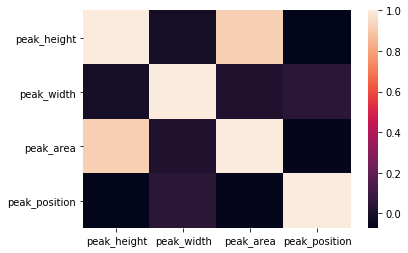

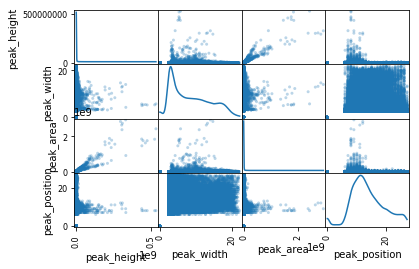

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

peak_props_all_data = merged_data_set[peak_properties]

sns.heatmap(peak_props_all_data.corr())

# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(peak_props_all_data, alpha=0.3, diagonal='kde')

plt.show()

You can tell there is a strong correlation between peak height and area. This makes sense that area under our peak would be calculated based on height. Let’s remove area and see if we can see any other correlations once we break down the data to important compound to mass pair associations

Mass pair ID:  0
Compound id:  None


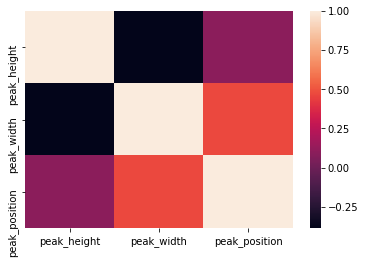

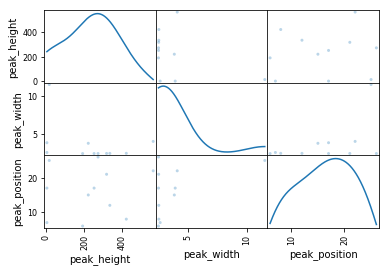

Mass pair ID:  0
Compound id:  10


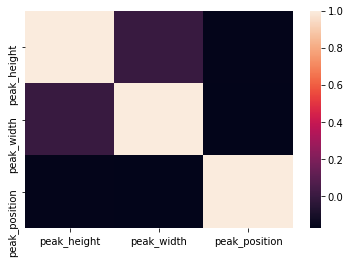

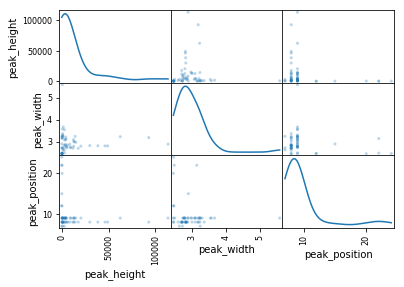

Mass pair ID:  1
Compound id:  None


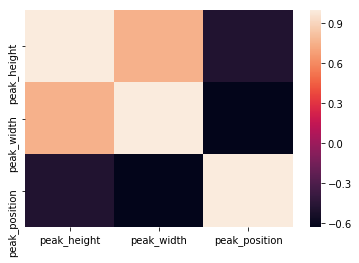

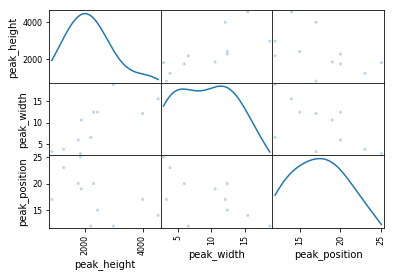

Mass pair ID:  2
Compound id:  None


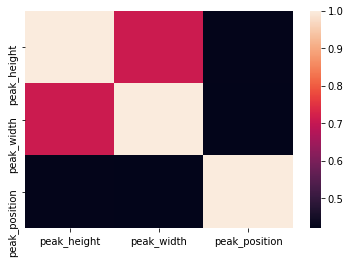

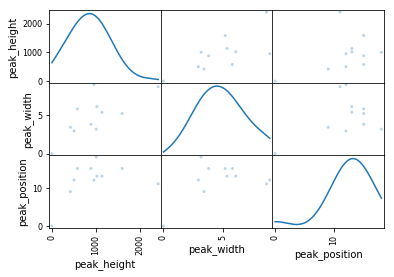

Mass pair ID:  2
Compound id:  4


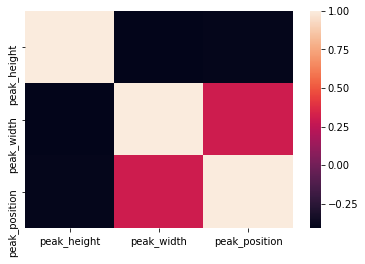

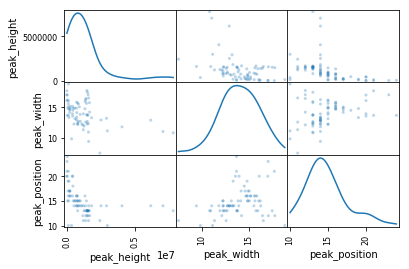

Mass pair ID:  3
Compound id:  None


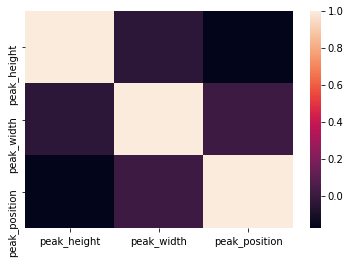

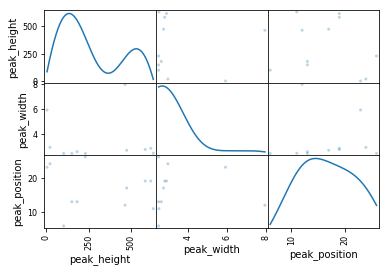

Mass pair ID:  3
Compound id:  10


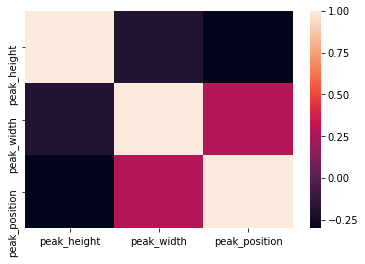

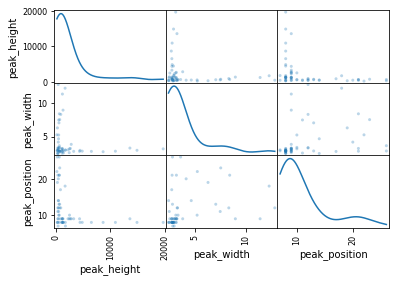

Mass pair ID:  4
Compound id:  None


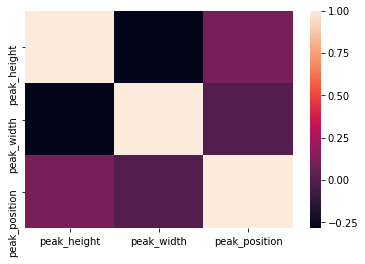

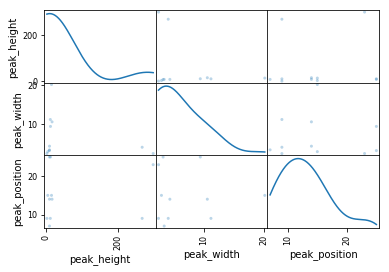

Mass pair ID:  4
Compound id:  10


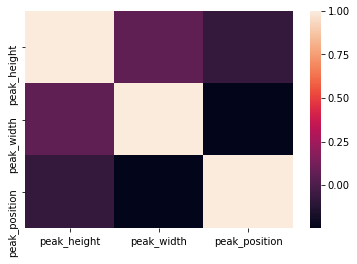

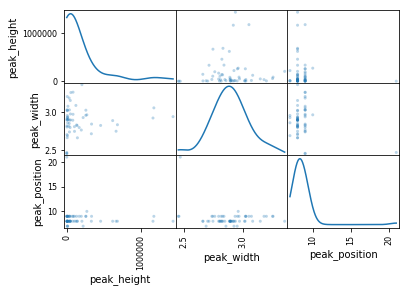

Mass pair ID:  5
Compound id:  None


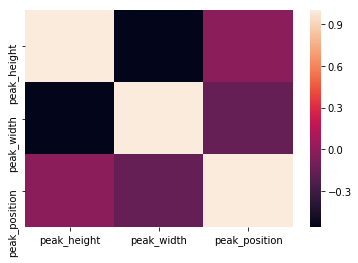

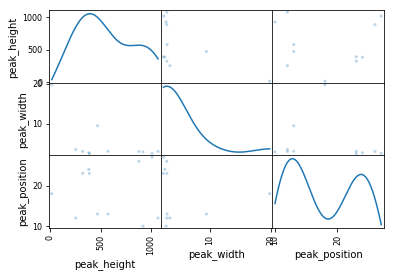

Mass pair ID:  6
Compound id:  None


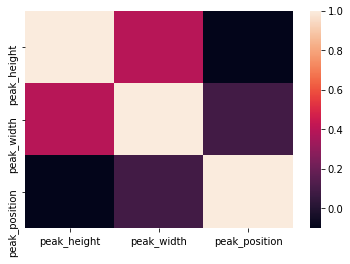

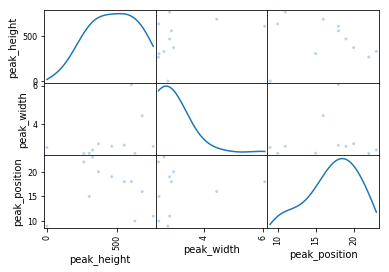

Mass pair ID:  7
Compound id:  None


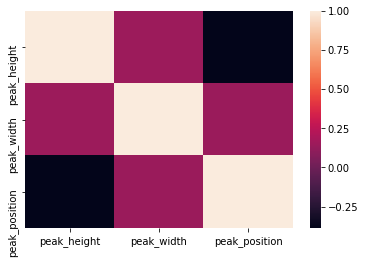

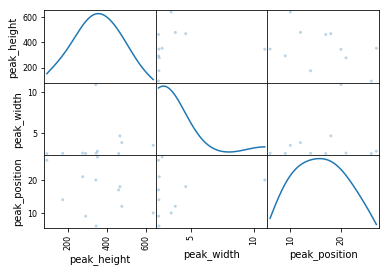

Mass pair ID:  7
Compound id:  19


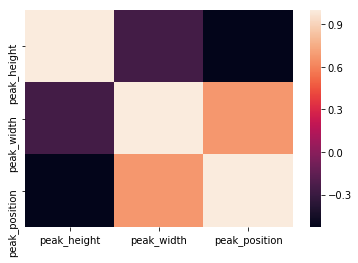

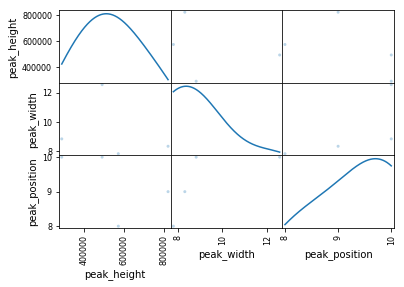

Mass pair ID:  8
Compound id:  None


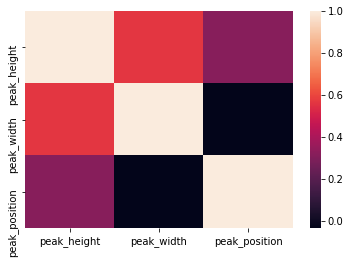

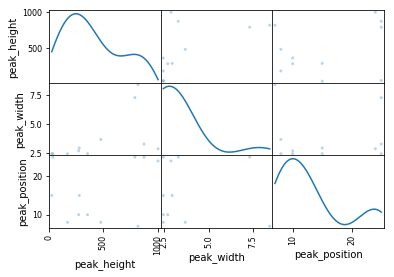

Mass pair ID:  8
Compound id:  19


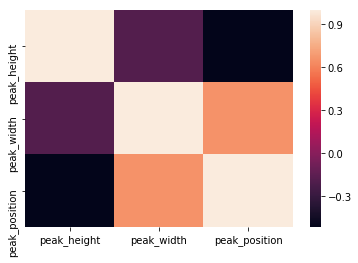

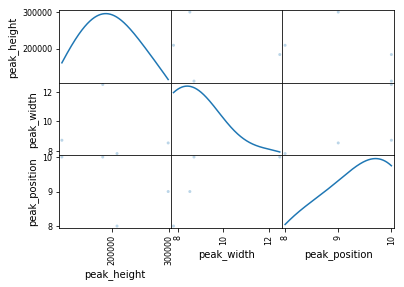

Mass pair ID:  9
Compound id:  None


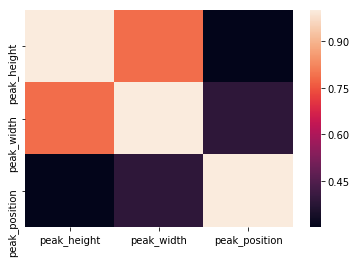

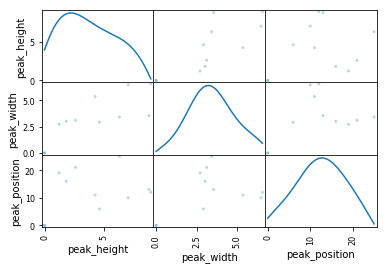

Mass pair ID:  10
Compound id:  None


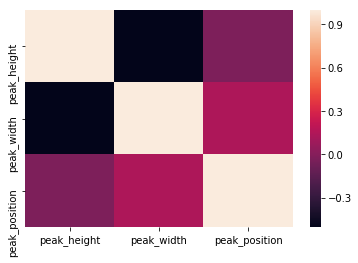

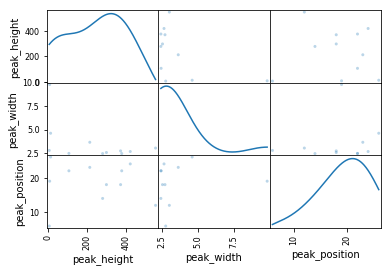

Mass pair ID:  11
Compound id:  None


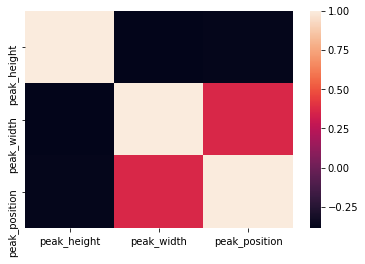

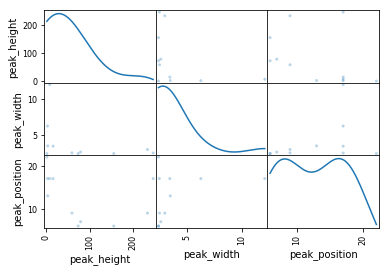

Mass pair ID:  11
Compound id:  4


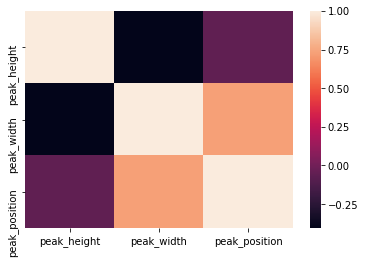

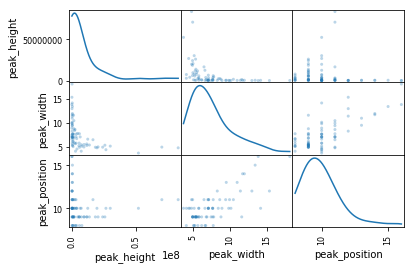

Mass pair ID:  12
Compound id:  None


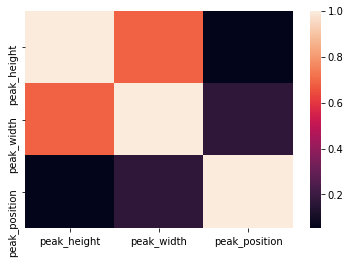

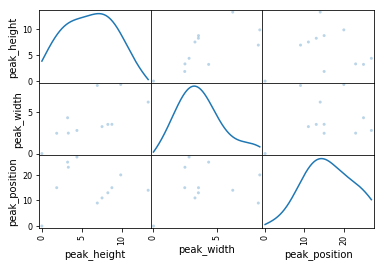

Mass pair ID:  13
Compound id:  None


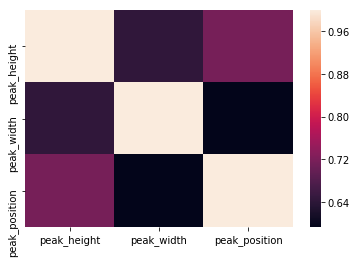

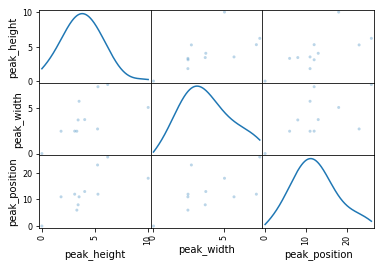

Mass pair ID:  14
Compound id:  None


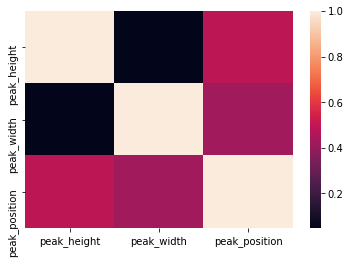

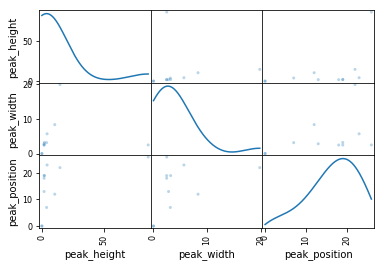

Mass pair ID:  15
Compound id:  None


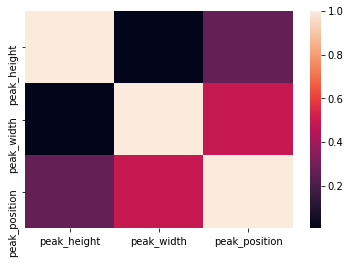

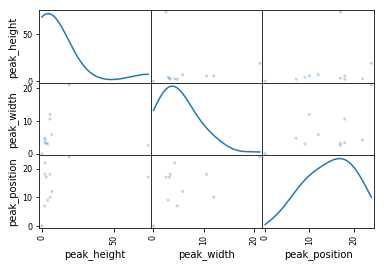

Mass pair ID:  16
Compound id:  None


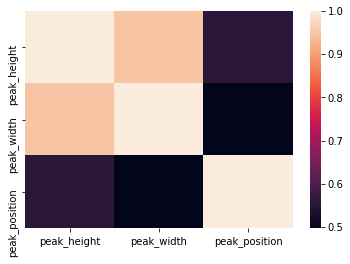

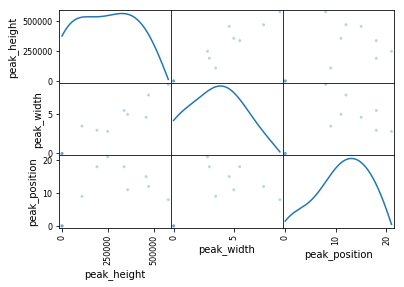

Mass pair ID:  16
Compound id:  14


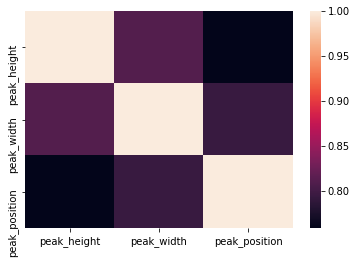

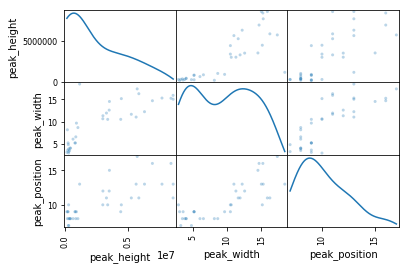

Mass pair ID:  16
Compound id:  7


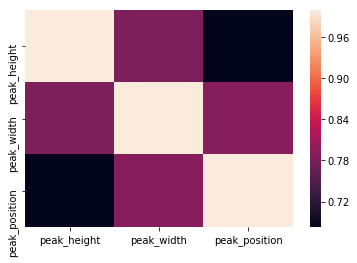

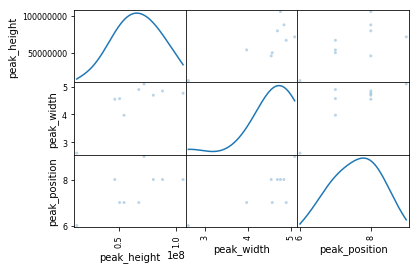

Mass pair ID:  16
Compound id:  8


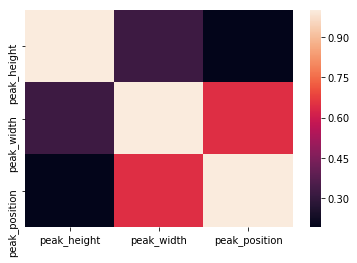

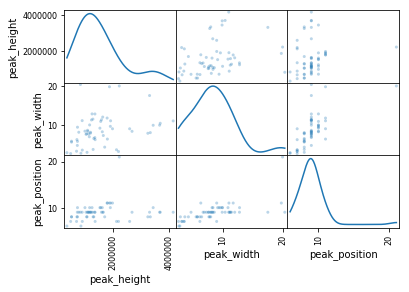

Mass pair ID:  17
Compound id:  None


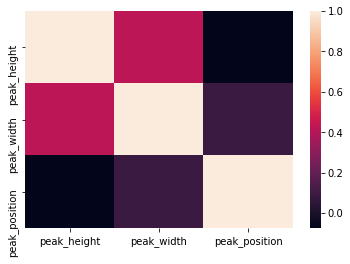

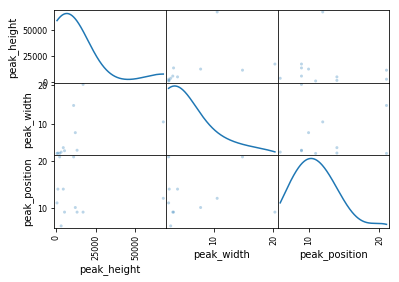

Mass pair ID:  18
Compound id:  None


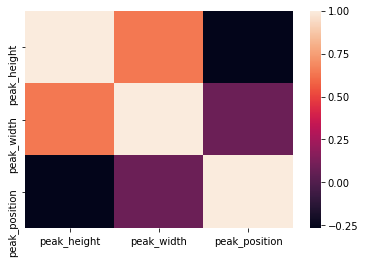

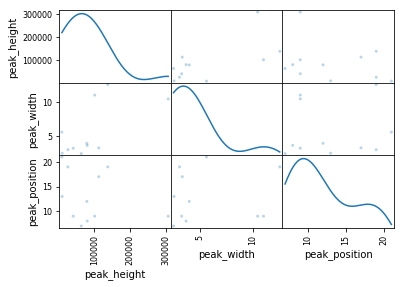

Mass pair ID:  18
Compound id:  14


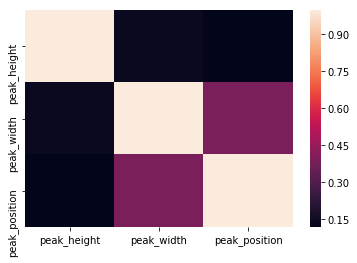

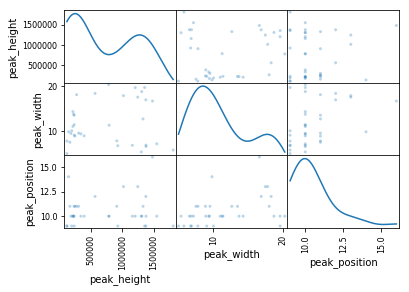

Mass pair ID:  18
Compound id:  7


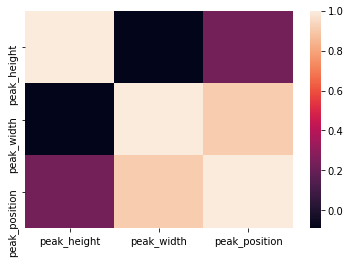

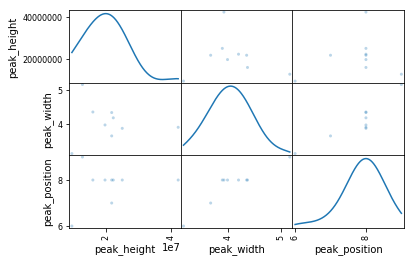

Mass pair ID:  18
Compound id:  8


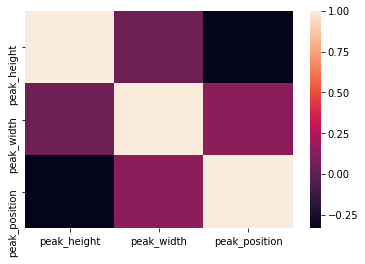

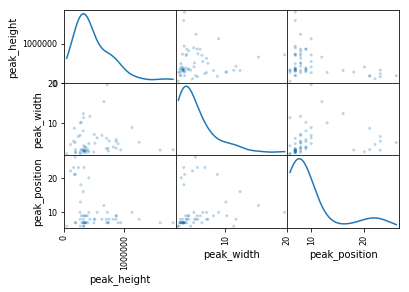

Mass pair ID:  19
Compound id:  None


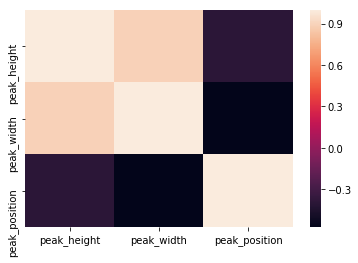

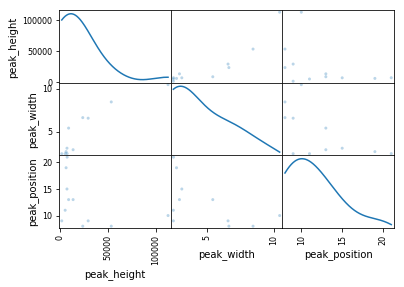

Mass pair ID:  19
Compound id:  10


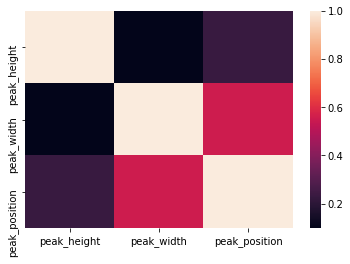

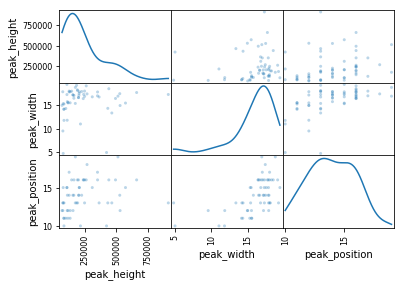

Mass pair ID:  19
Compound id:  18


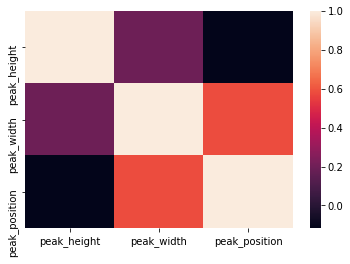

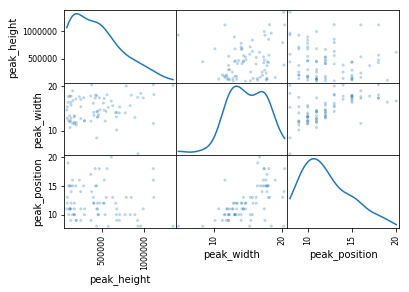

Mass pair ID:  20
Compound id:  None


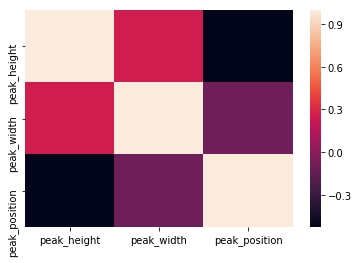

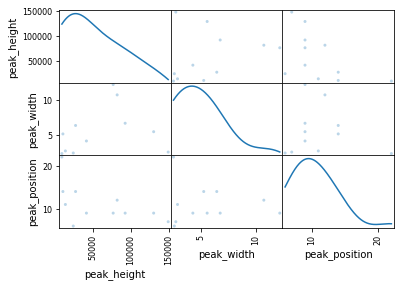

Mass pair ID:  20
Compound id:  10


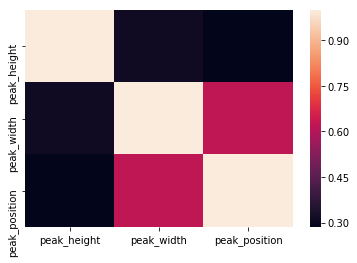

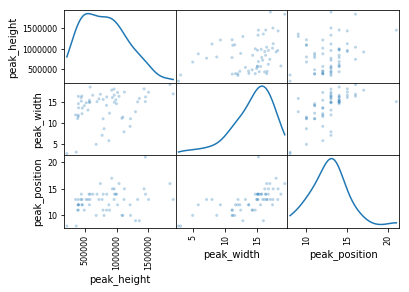

Mass pair ID:  20
Compound id:  18


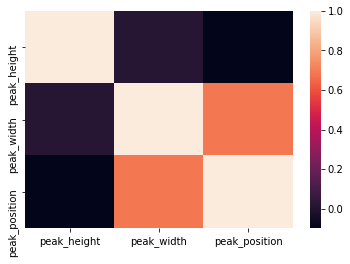

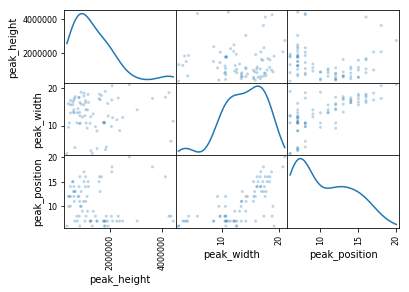

Mass pair ID:  20
Compound id:  3


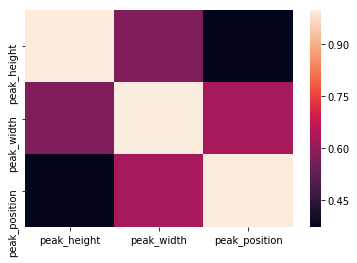

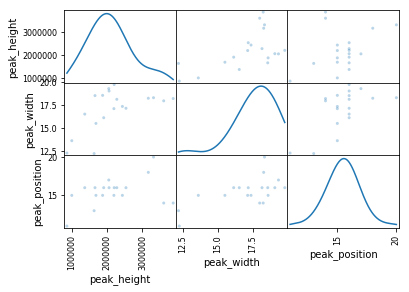

Mass pair ID:  21
Compound id:  None


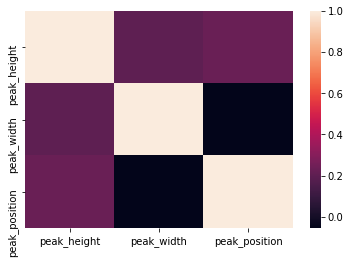

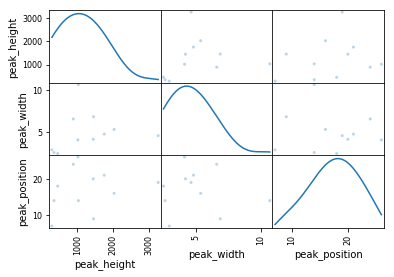

Mass pair ID:  21
Compound id:  18


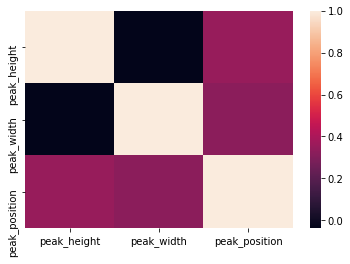

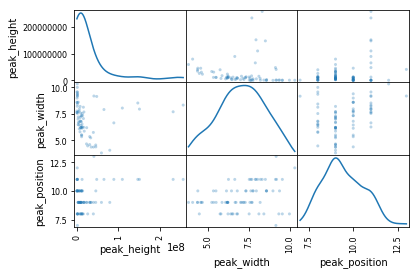

Mass pair ID:  22
Compound id:  None


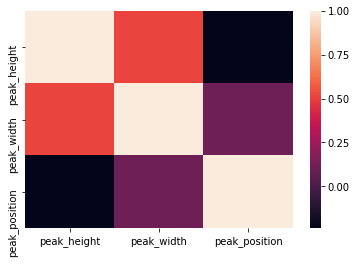

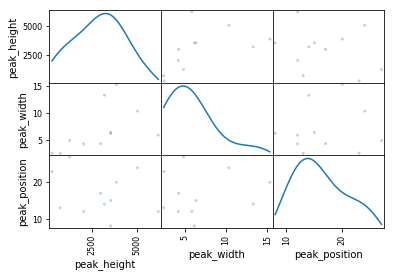

Mass pair ID:  22
Compound id:  10


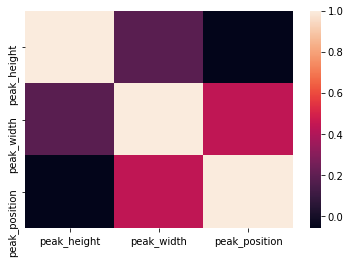

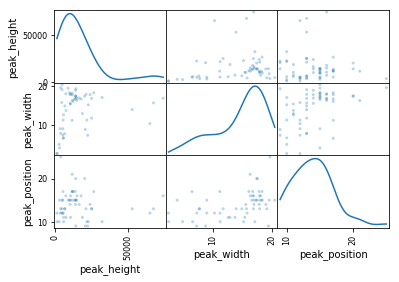

Mass pair ID:  22
Compound id:  21


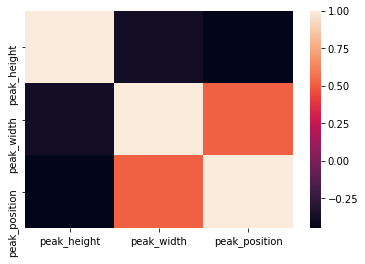

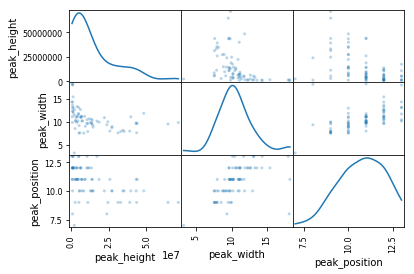

Mass pair ID:  22
Compound id:  0


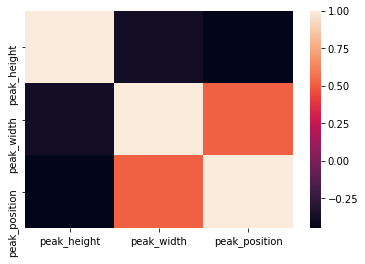

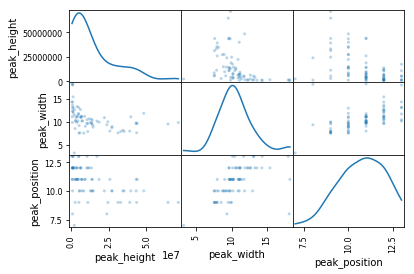

Mass pair ID:  23
Compound id:  None


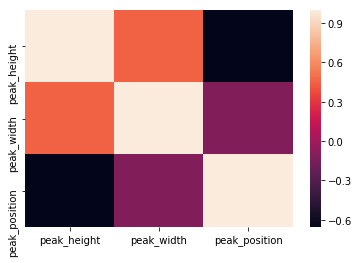

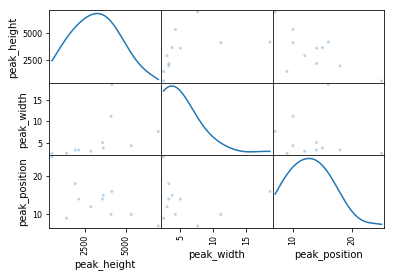

Mass pair ID:  23
Compound id:  10


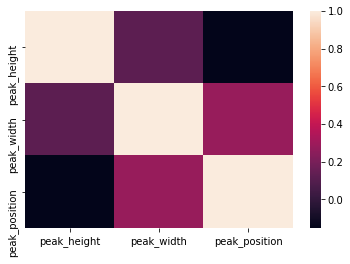

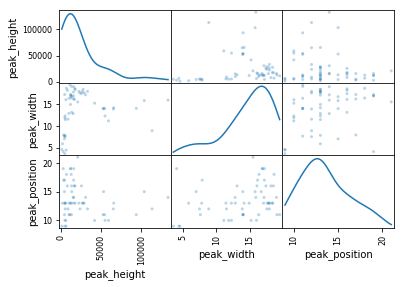

Mass pair ID:  23
Compound id:  21


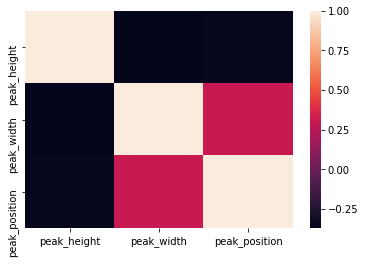

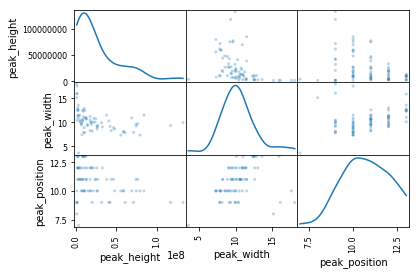

Mass pair ID:  23
Compound id:  0


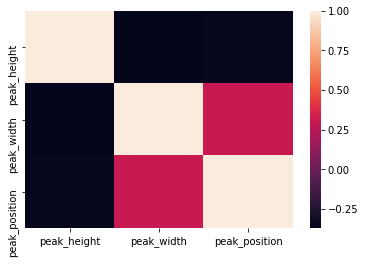

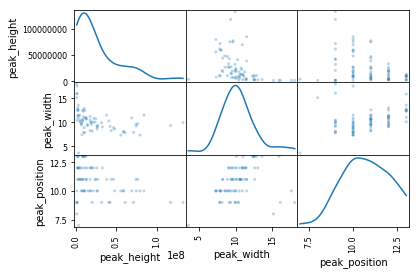

Mass pair ID:  24
Compound id:  None


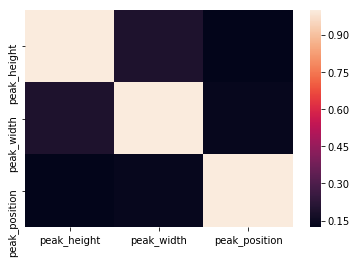

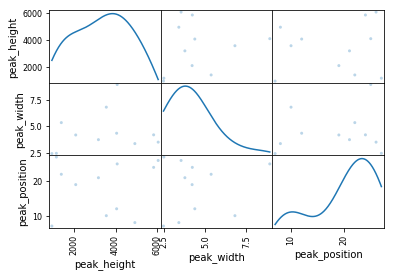

Mass pair ID:  25
Compound id:  None


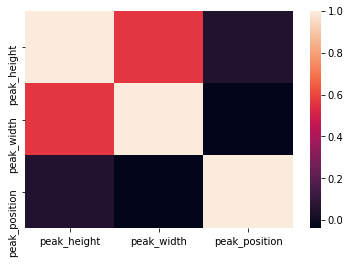

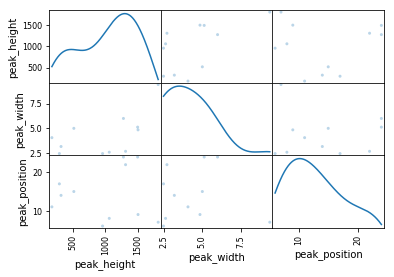

Mass pair ID:  25
Compound id:  21


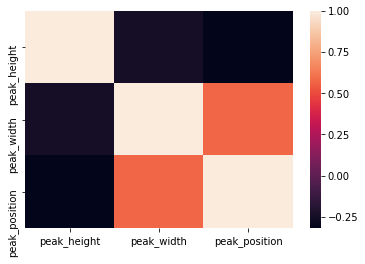

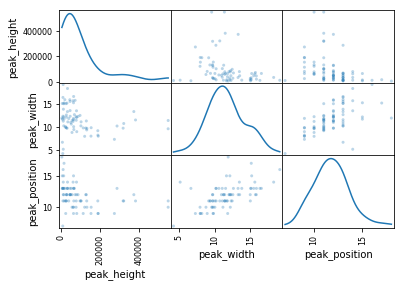

Mass pair ID:  25
Compound id:  0


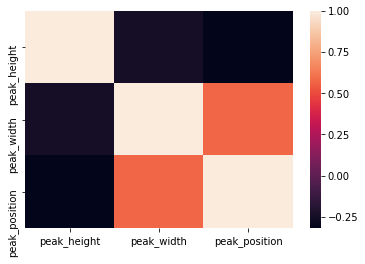

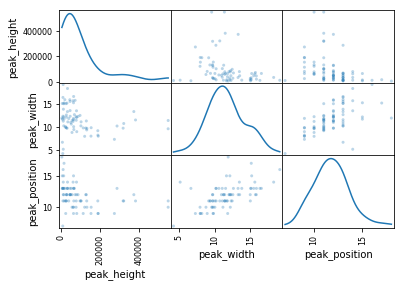

Mass pair ID:  26
Compound id:  None


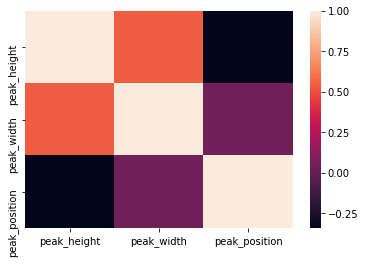

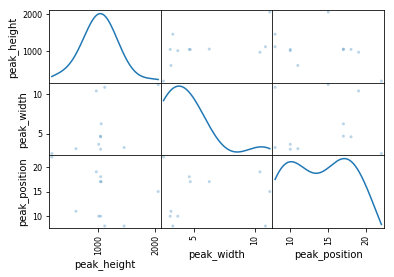

Mass pair ID:  26
Compound id:  21


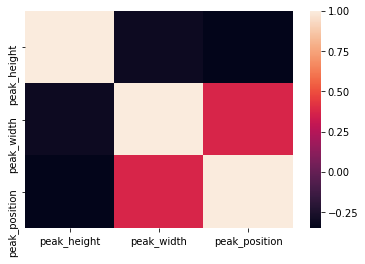

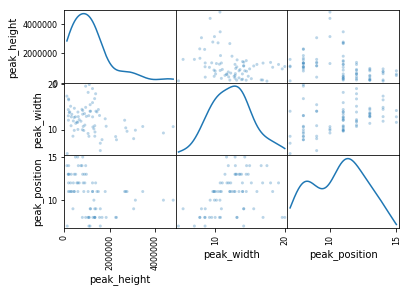

Mass pair ID:  26
Compound id:  0


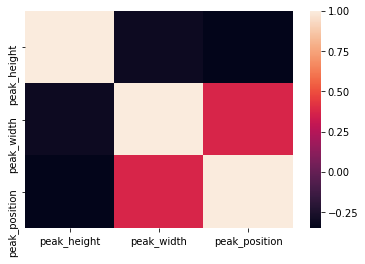

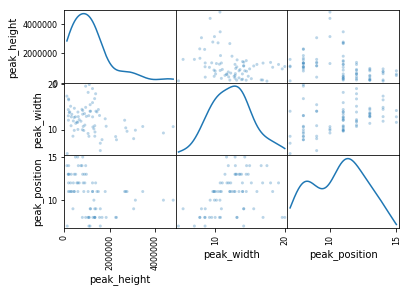

Mass pair ID:  27
Compound id:  None


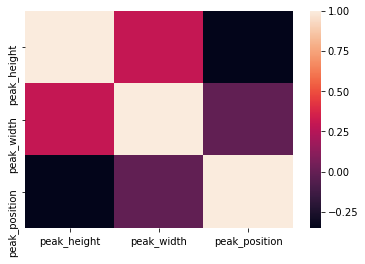

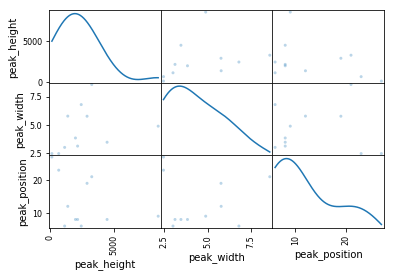

Mass pair ID:  27
Compound id:  7


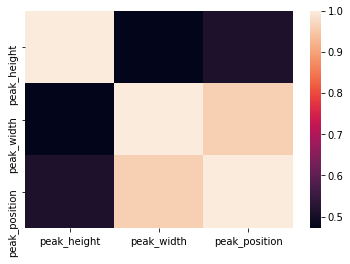

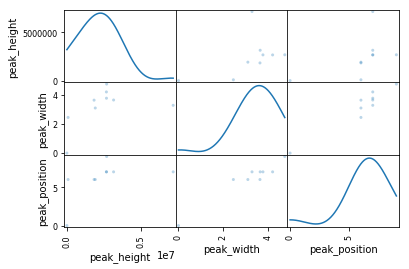

Mass pair ID:  28
Compound id:  None


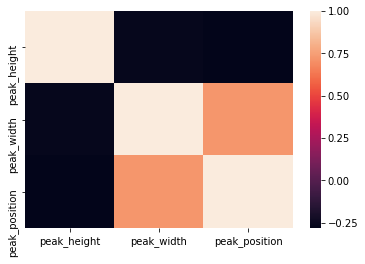

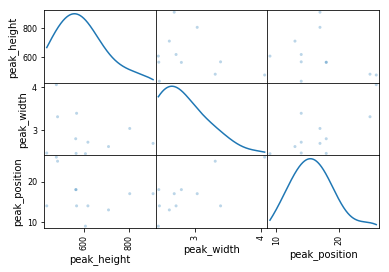

Mass pair ID:  29
Compound id:  None


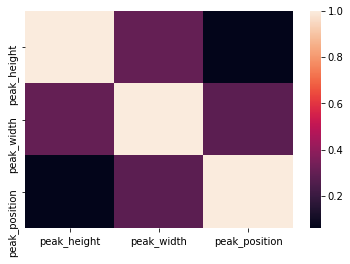

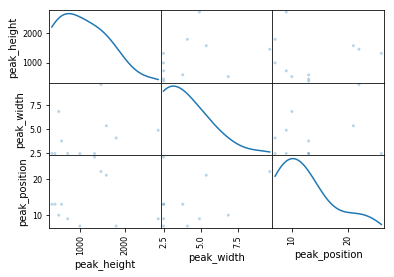

Mass pair ID:  30
Compound id:  None


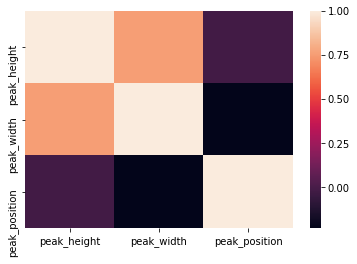

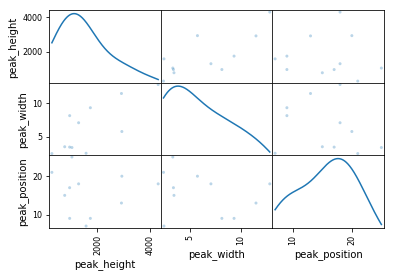

Mass pair ID:  30
Compound id:  7


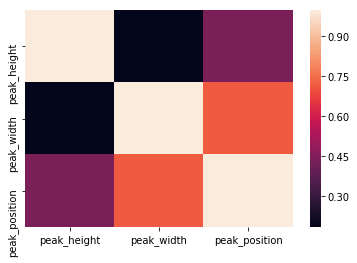

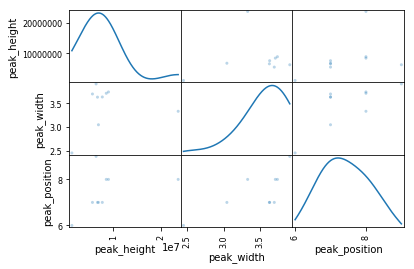

Mass pair ID:  31
Compound id:  None


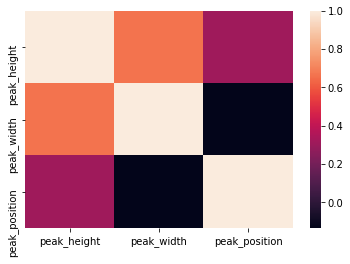

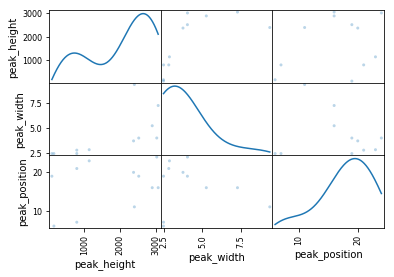

Mass pair ID:  32
Compound id:  None


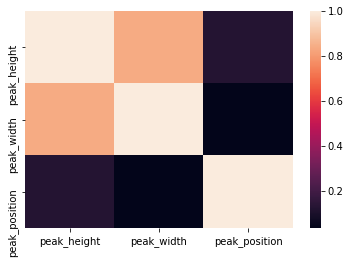

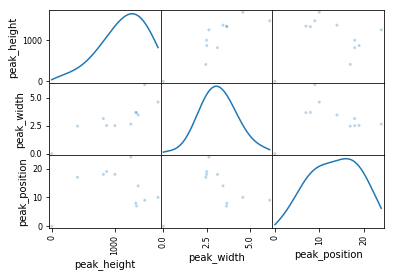

Mass pair ID:  33
Compound id:  None


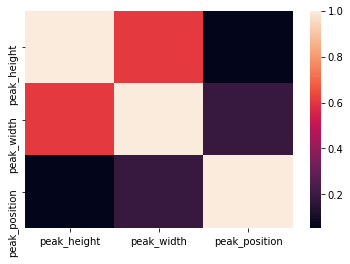

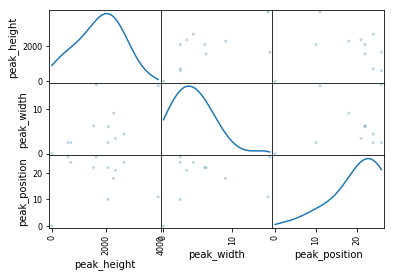

Mass pair ID:  33
Compound id:  21


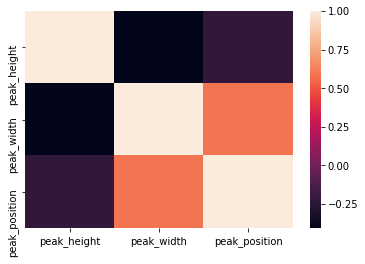

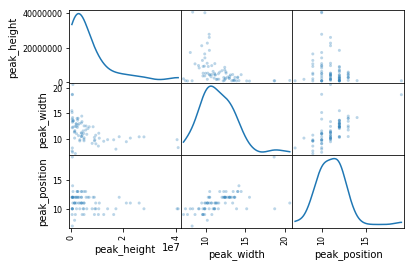

Mass pair ID:  33
Compound id:  0


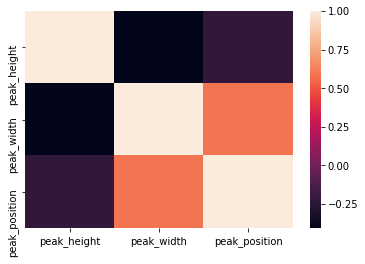

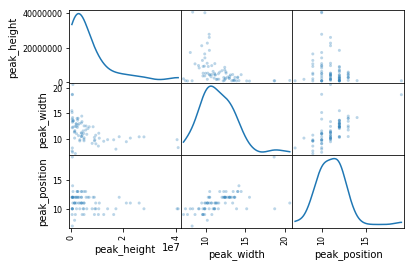

Mass pair ID:  34
Compound id:  None


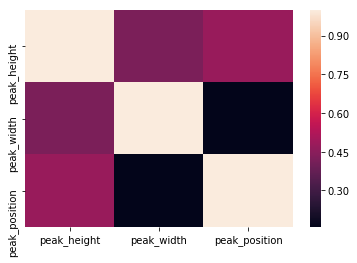

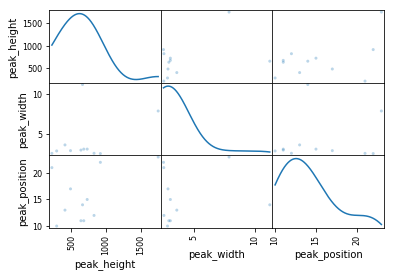

Mass pair ID:  34
Compound id:  21


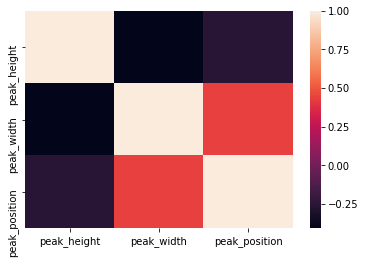

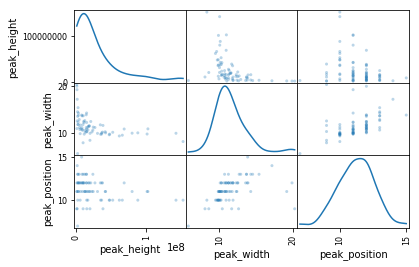

Mass pair ID:  34
Compound id:  0


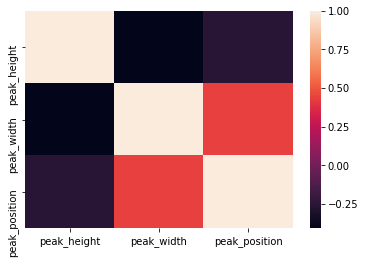

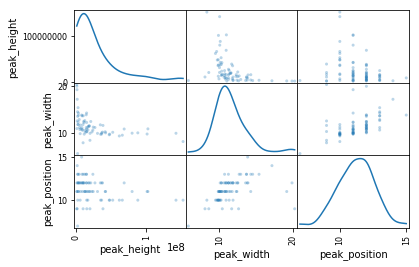

Mass pair ID:  35
Compound id:  None


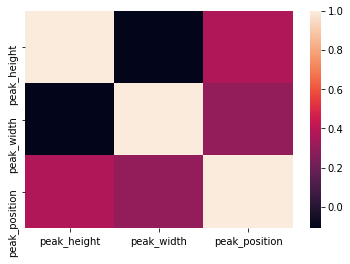

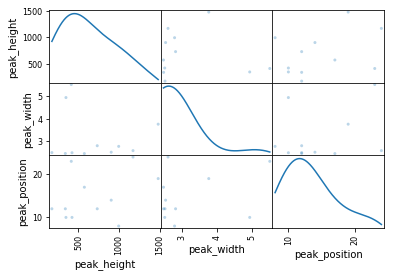

Mass pair ID:  35
Compound id:  22


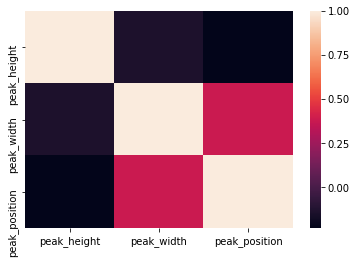

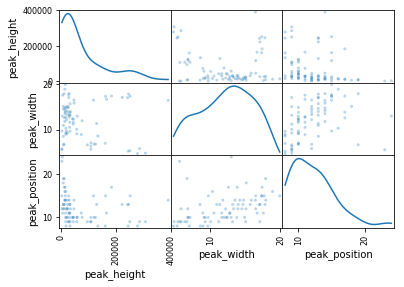

Mass pair ID:  36
Compound id:  None


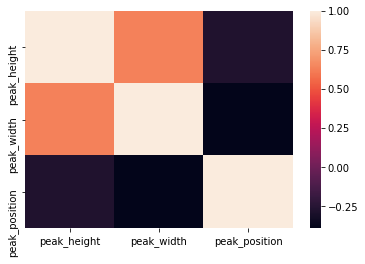

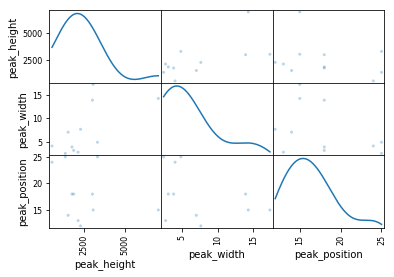

Mass pair ID:  36
Compound id:  15


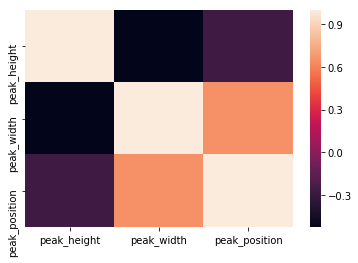

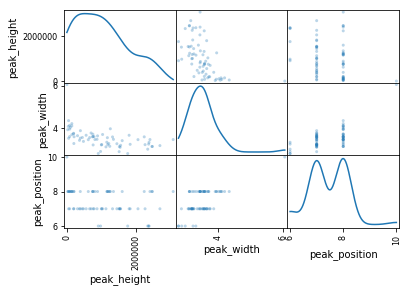

Mass pair ID:  37
Compound id:  None


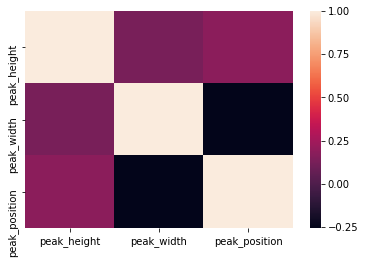

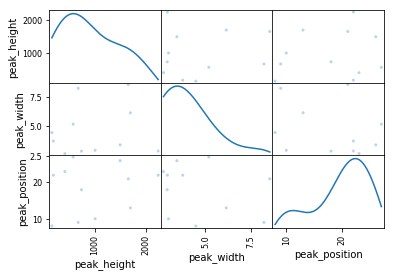

Mass pair ID:  37
Compound id:  22


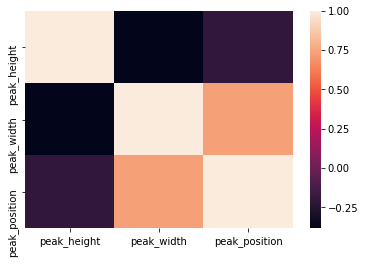

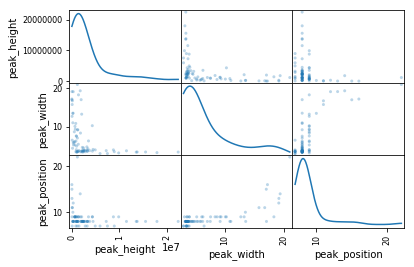

Mass pair ID:  38
Compound id:  None


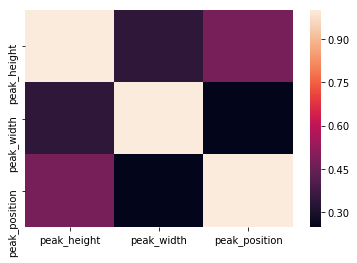

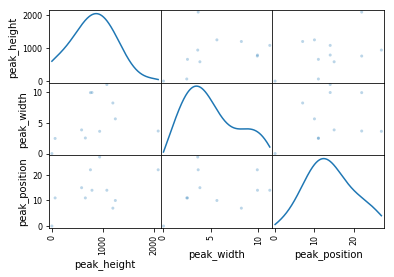

Mass pair ID:  38
Compound id:  22


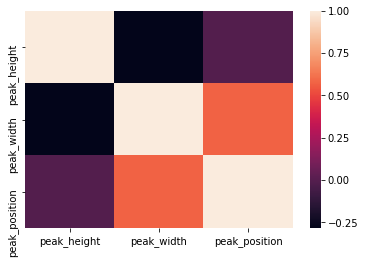

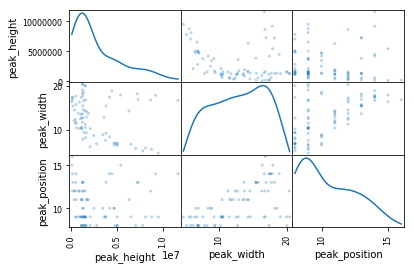

Mass pair ID:  39
Compound id:  None


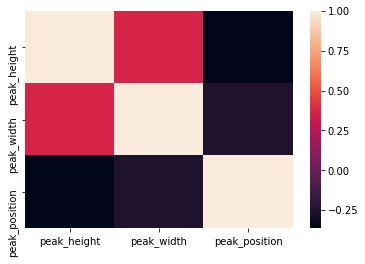

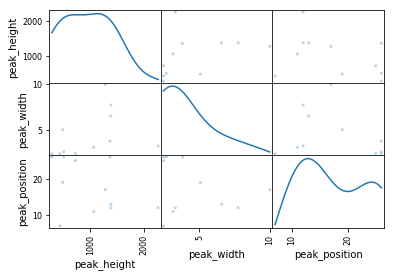

Mass pair ID:  39
Compound id:  15


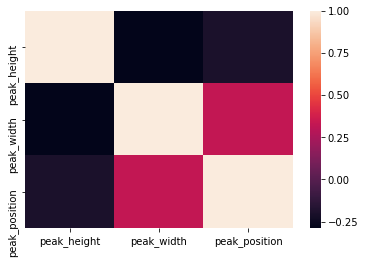

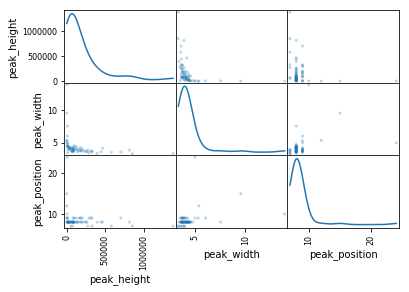

Mass pair ID:  39
Compound id:  8


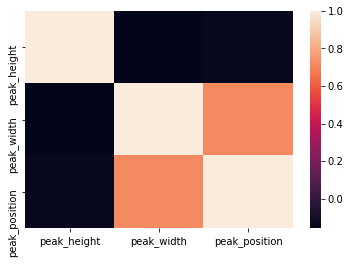

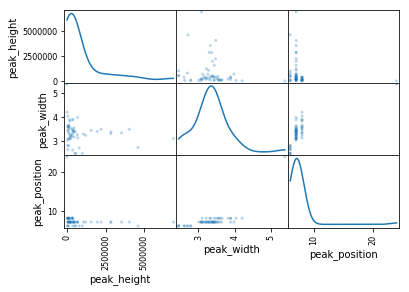

Mass pair ID:  40
Compound id:  None


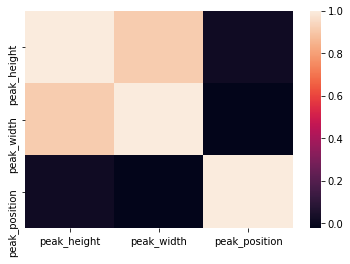

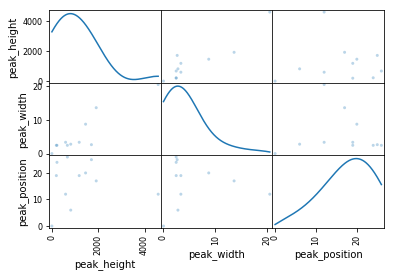

Mass pair ID:  40
Compound id:  18


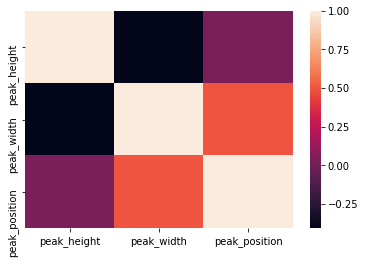

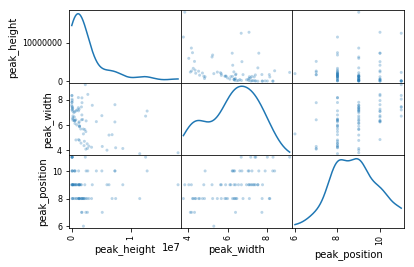

Mass pair ID:  41
Compound id:  None


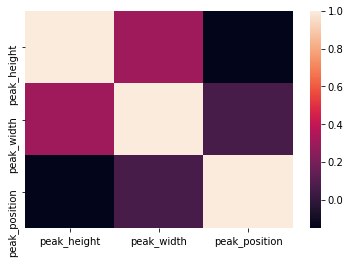

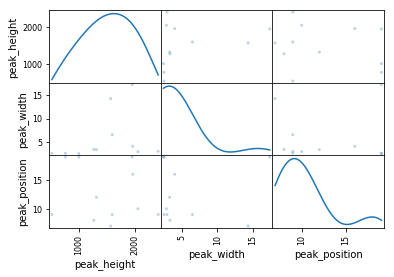

Mass pair ID:  41
Compound id:  13


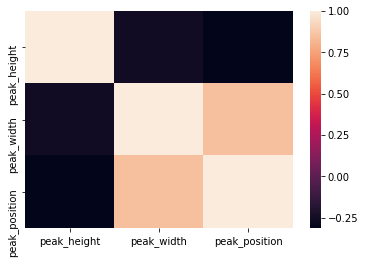

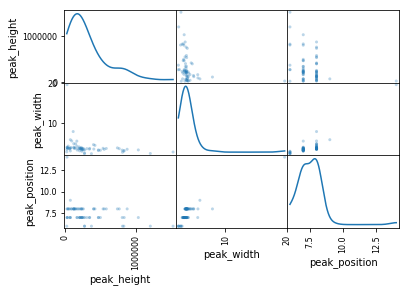

Mass pair ID:  42
Compound id:  None


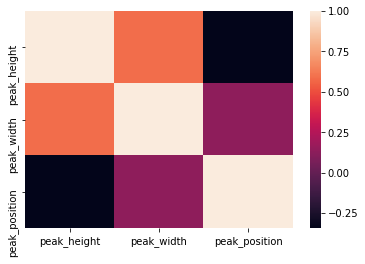

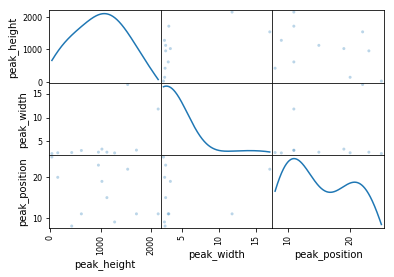

Mass pair ID:  42
Compound id:  13


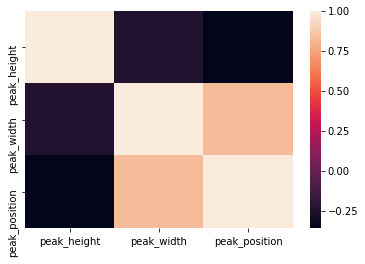

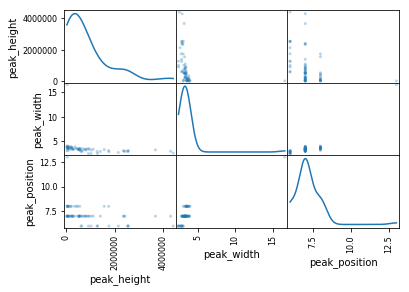

Mass pair ID:  43
Compound id:  None


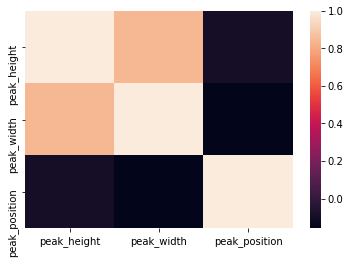

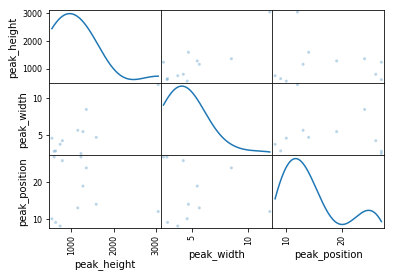

Mass pair ID:  44
Compound id:  None


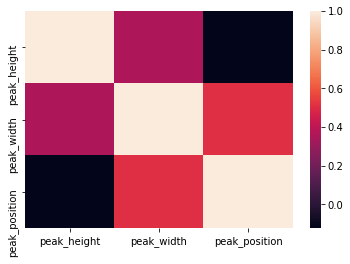

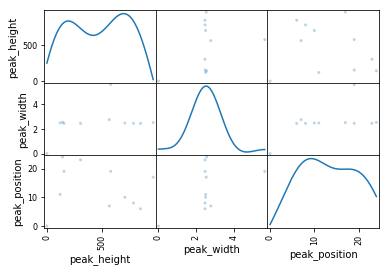

Mass pair ID:  45
Compound id:  None


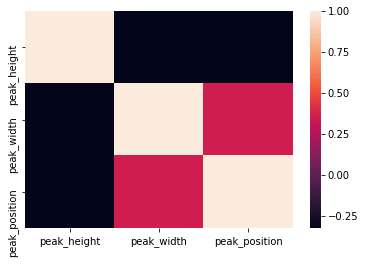

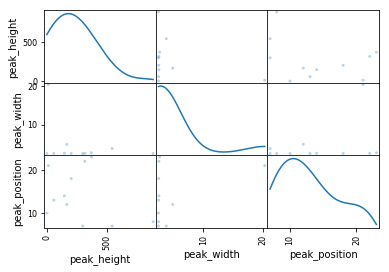

Mass pair ID:  46
Compound id:  None


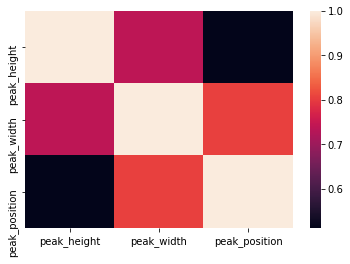

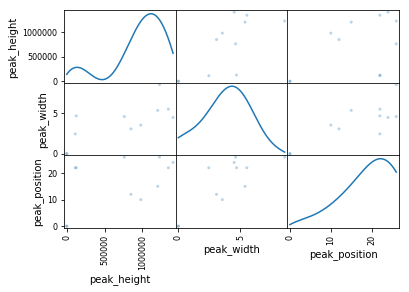

Mass pair ID:  46
Compound id:  13


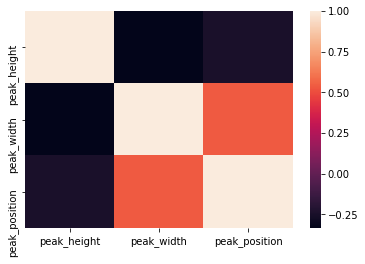

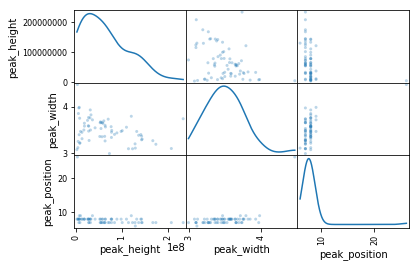

Mass pair ID:  46
Compound id:  14


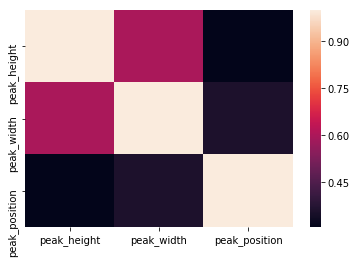

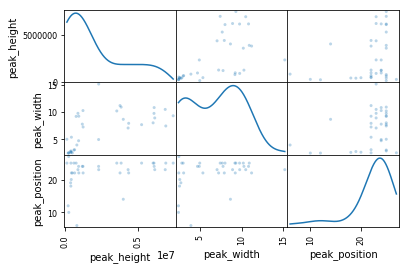

Mass pair ID:  46
Compound id:  15


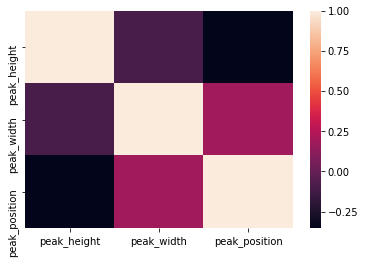

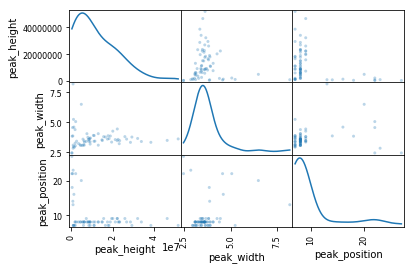

Mass pair ID:  46
Compound id:  7


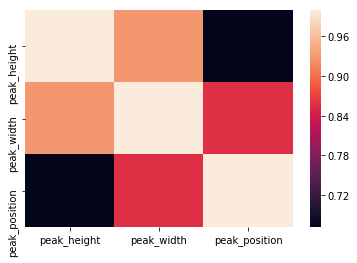

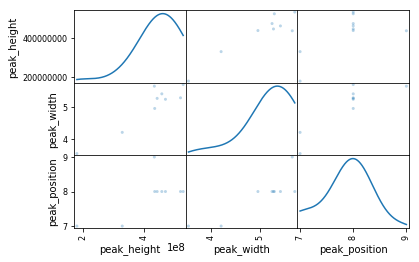

Mass pair ID:  46
Compound id:  8


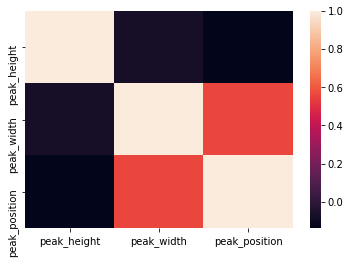

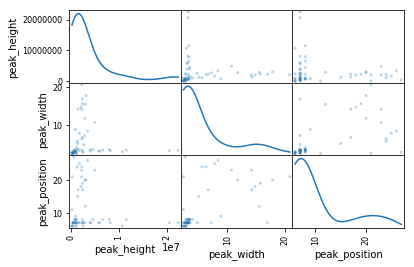

Mass pair ID:  47
Compound id:  None


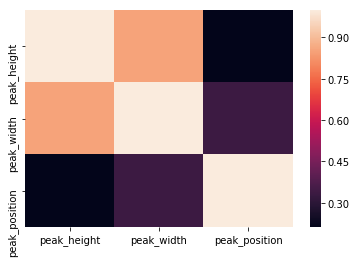

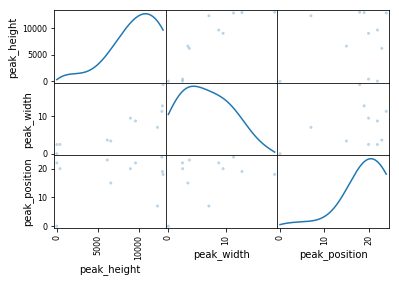

Mass pair ID:  47
Compound id:  3


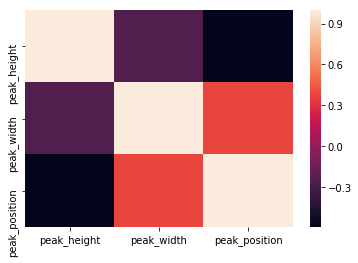

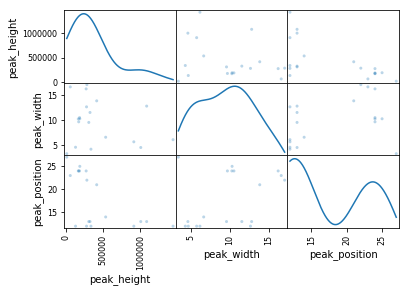

Mass pair ID:  48
Compound id:  None


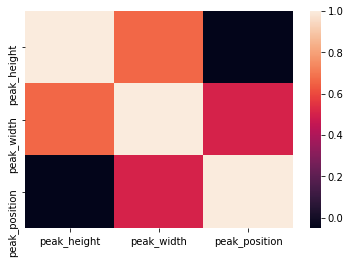

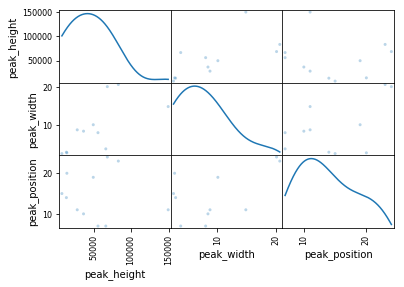

Mass pair ID:  49
Compound id:  None


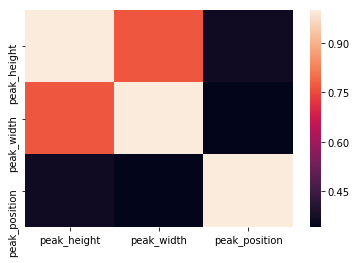

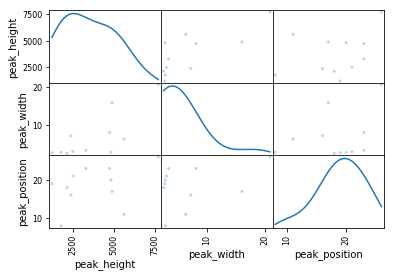

Mass pair ID:  49
Compound id:  3


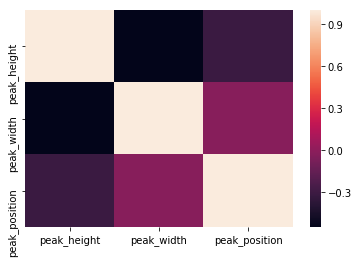

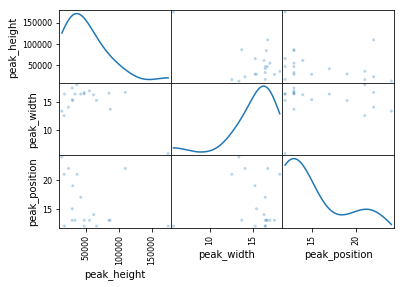

Mass pair ID:  50
Compound id:  None


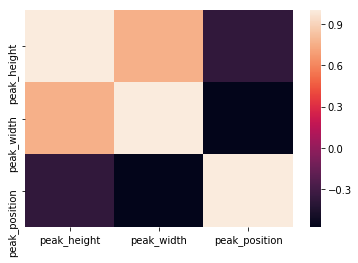

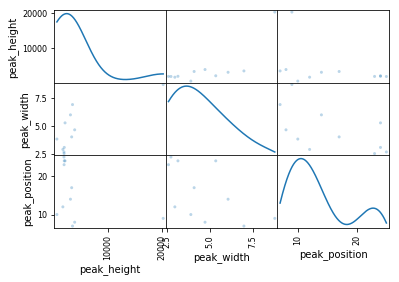

Mass pair ID:  50
Compound id:  3


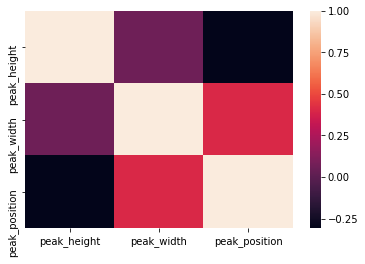

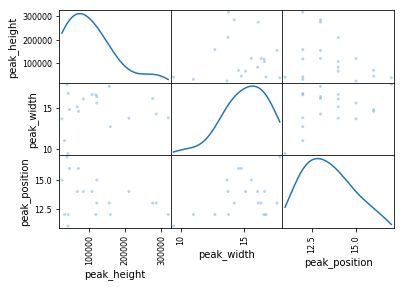

In [101]:
peak_properties = ['peak_height', 'peak_width', 'peak_position']

for mass_pair_id, compound_id_to_dataset in mass_pair_id_to_compound_ids_to_dataset.items():
    for compound_id, dataset in compound_id_to_dataset.items():
        print("Mass pair ID: ", mass_pair_id)  
        print("Compound id: ", compound_id)
        peak_props = dataset[peak_properties]
        sns.heatmap(peak_props.corr())

        # Produce a scatter matrix for each pair of features in the data
        pd.plotting.scatter_matrix(peak_props, alpha=0.3, diagonal='kde')
        
        plt.show()

In most cases there is no other correlation. Some of the heatmaps show a little bit, but I think it could just be due to a lack of samples. Most of the scatter plots show a shifted gaussian curve. I am going to apply a log transform to see if I can center the gaussian  curves.

Mass pair ID:  0
Compound id:  None


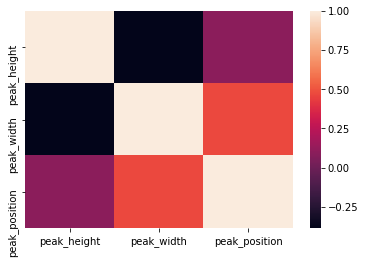

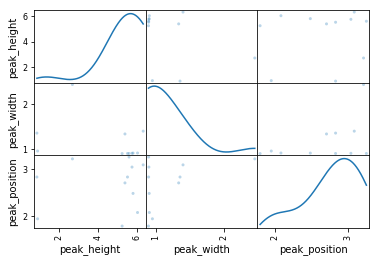

Mass pair ID:  0
Compound id:  10


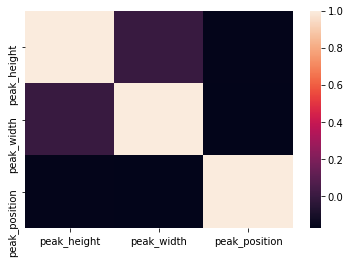

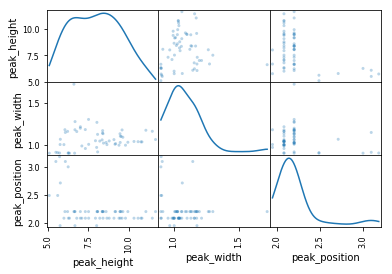

Mass pair ID:  1
Compound id:  None


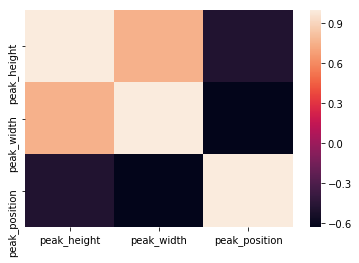

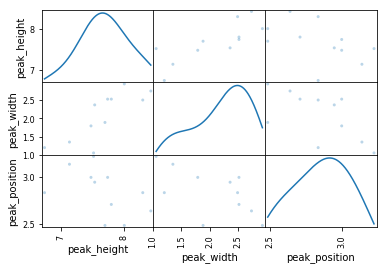

Mass pair ID:  2
Compound id:  None


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\numpy\lib\function_base.py:3103: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


ValueError: array must not contain infs or NaNs

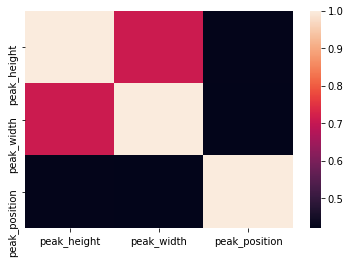

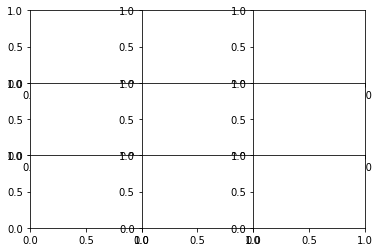

In [102]:
import numpy as np

for mass_pair_id, compound_id_to_dataset in mass_pair_id_to_compound_ids_to_dataset.items():
    for compound_id, dataset in compound_id_to_dataset.items():
        print("Mass pair ID: ", mass_pair_id)  
        print("Compound id: ", compound_id)
        peak_props = dataset[peak_properties]
        sns.heatmap(peak_props.corr())

        # Produce a scatter matrix for each pair of features in the data
        pd.plotting.scatter_matrix(np.log(peak_props), alpha=0.3, diagonal='kde')
        
        plt.show()

For the most part, width seems to be a very stable and independent feature. Position and height even though not correlated tend to mimic each other so I could probably get away with using either just height or position. I will try position because it previously had the least amount of standard deviation. Some of the mass pair to compounds are much more stable than others. On all cases, there are some outliers. Depending on the algorithm I use, I may need to remove these outliers to not overfit my model. Next, I want to plot and label all my mass pair data to get an idea of how well my algorithm will do on test data.

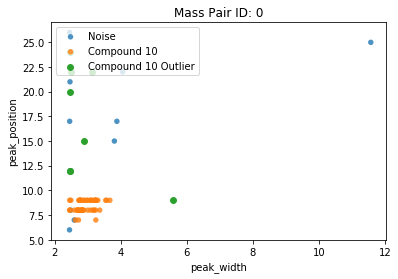

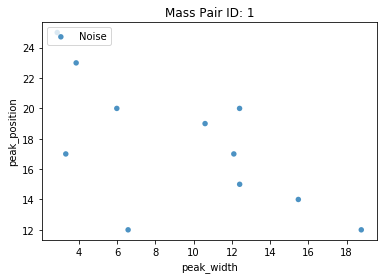

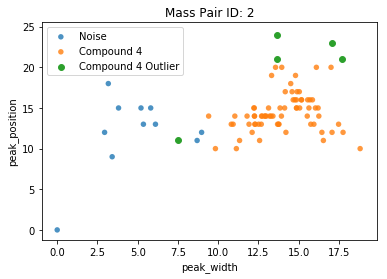

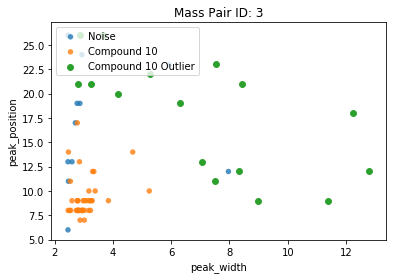

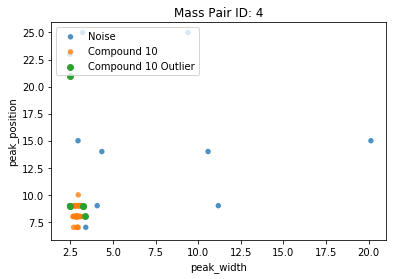

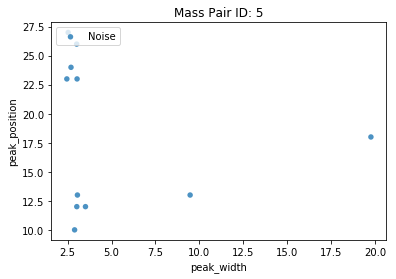

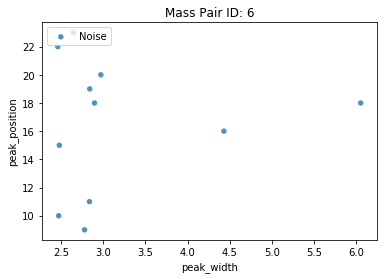

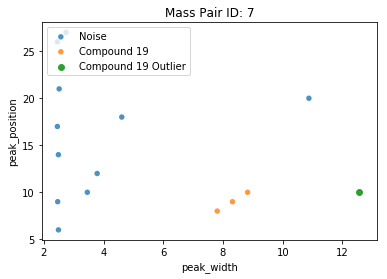

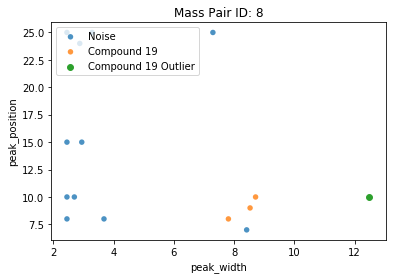

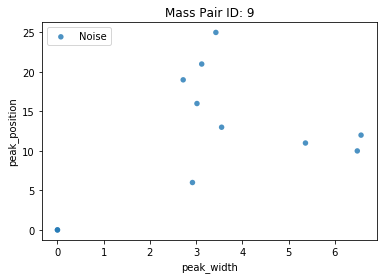

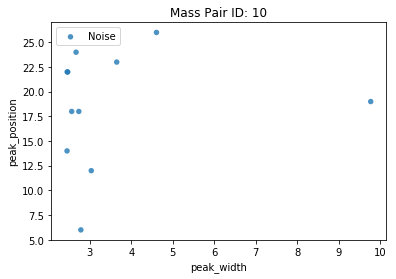

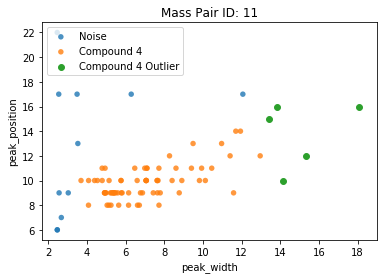

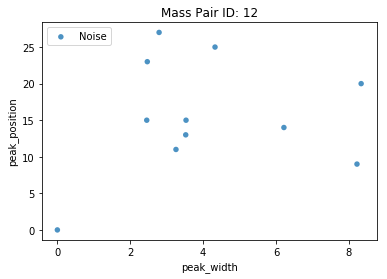

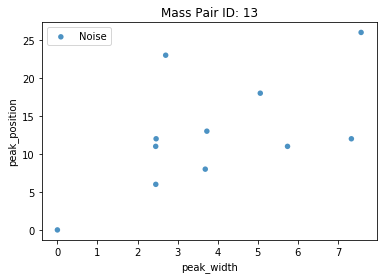

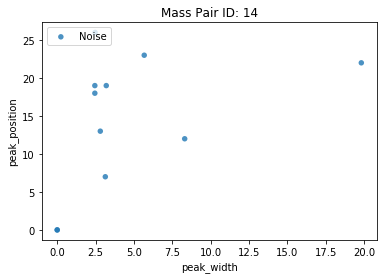

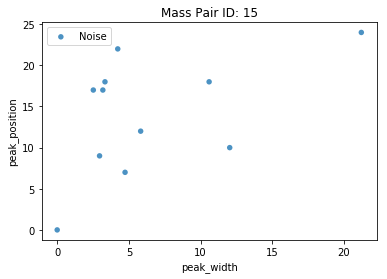

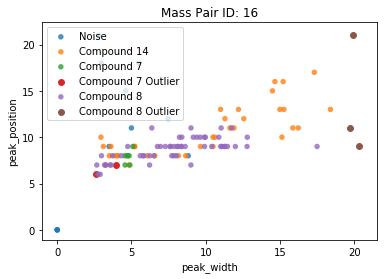

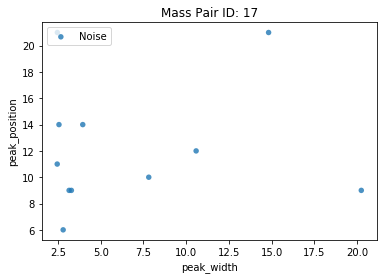

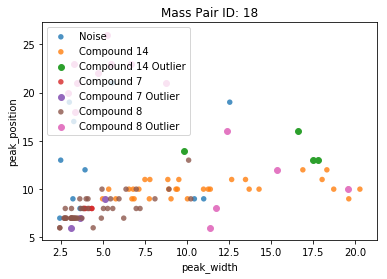

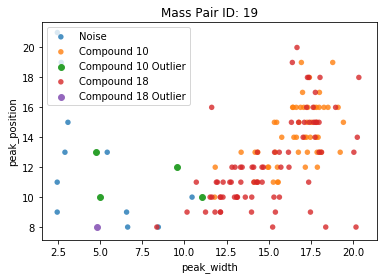

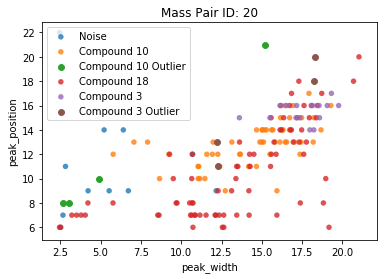

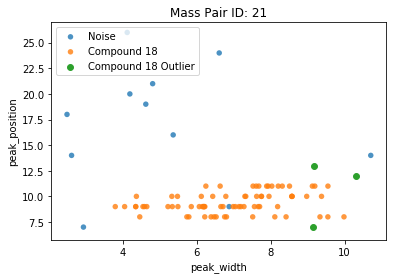

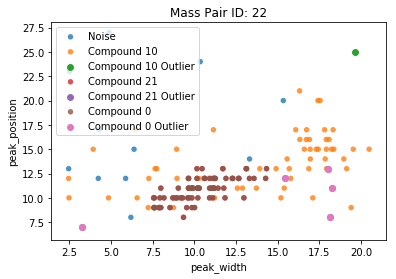

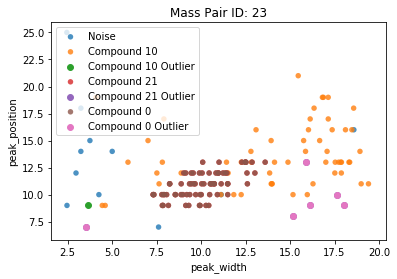

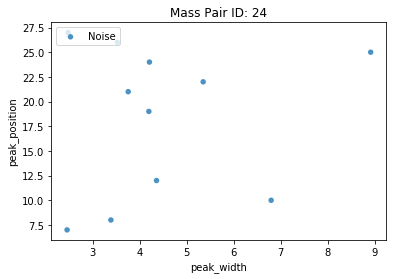

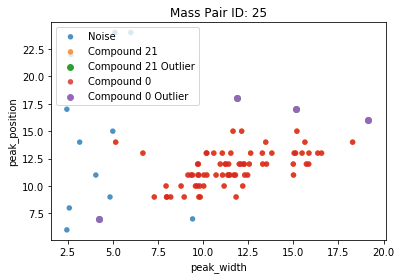

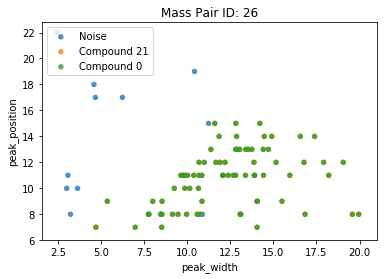

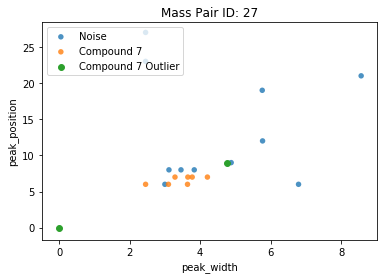

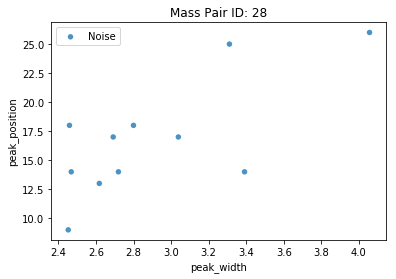

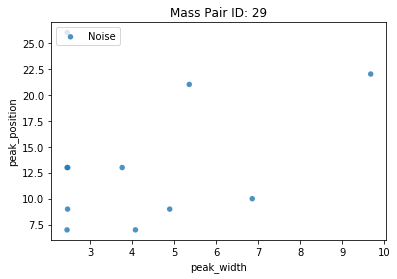

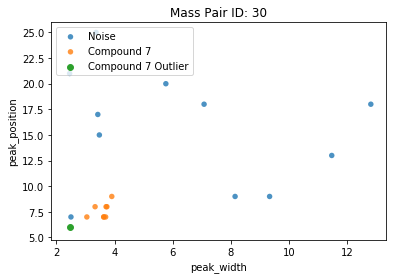

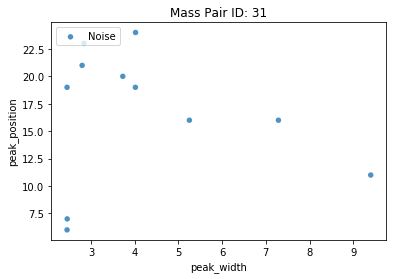

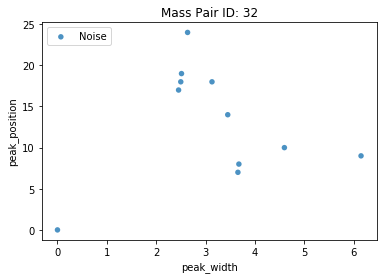

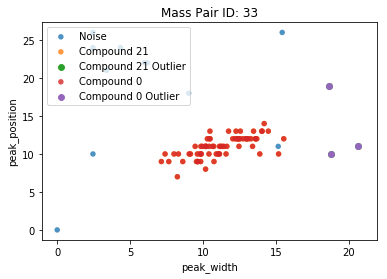

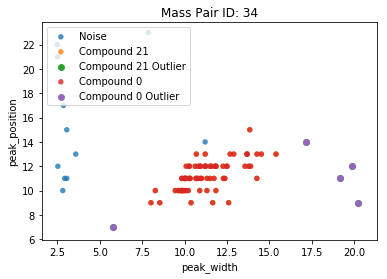

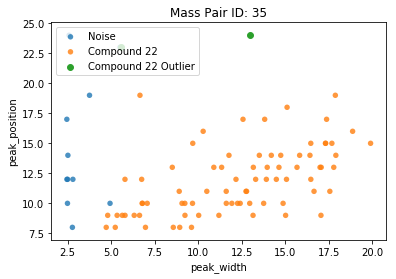

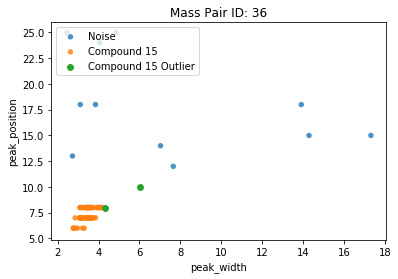

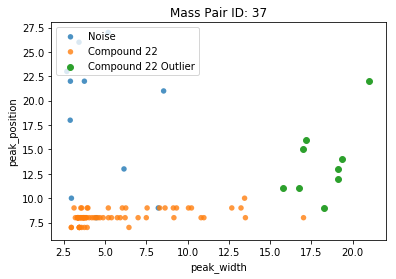

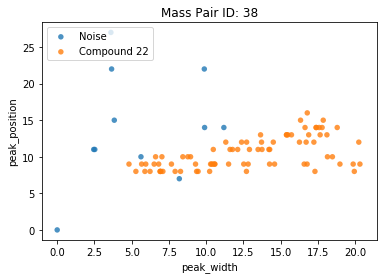

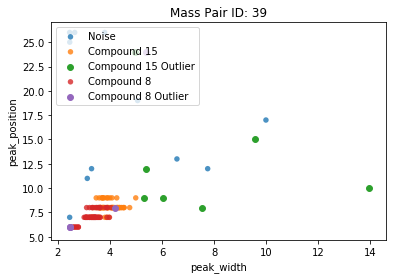

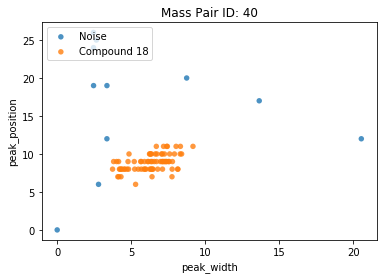

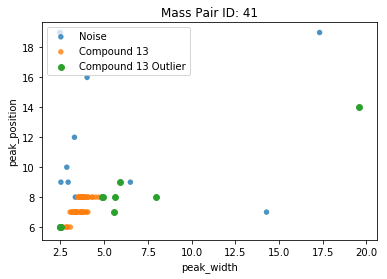

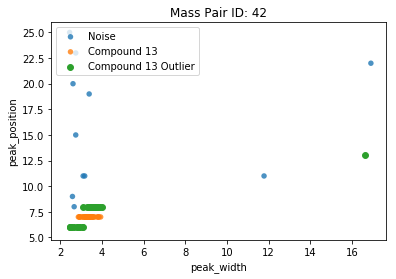

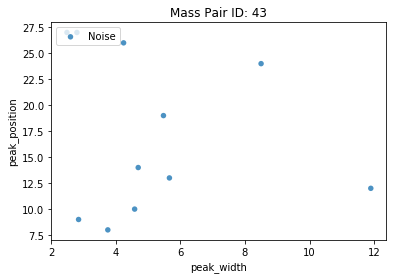

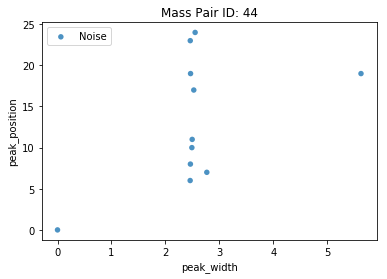

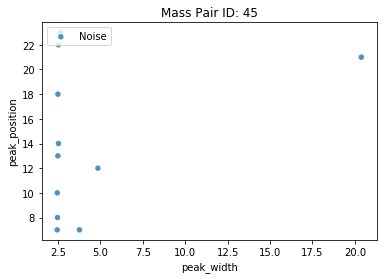

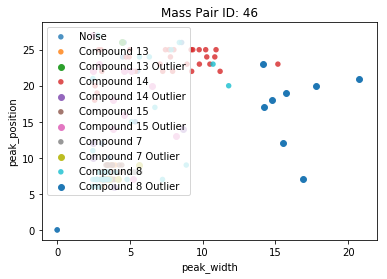

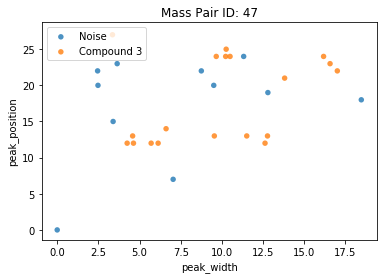

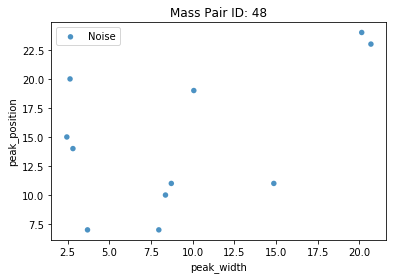

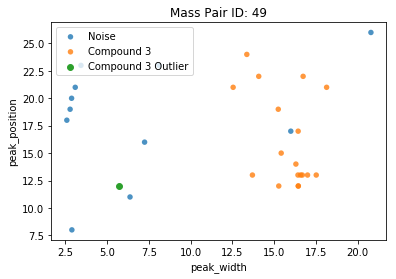

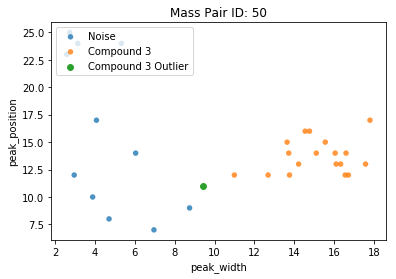

In [104]:
peak_properties = ['peak_width', 'peak_position']

def find_outliers(gaussian_data: pd.DataFrame):
    outliers = []
    commonOutliers = []

    # For each feature find the data points with extreme high or low values
    for feature in gaussian_data.keys():
        # Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(gaussian_data[feature], 25)

        # Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(gaussian_data[feature], 75)

        # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        step = (Q3 - Q1) * 1.5

        data = gaussian_data[~((gaussian_data[feature] >= Q1 - step) &
                               (gaussian_data[feature] <= Q3 + step))]

        # Display the outliers
        #print("Data points considered outliers for the feature '{}':".format(feature))
        #print(data)

        for index, _ in data.iterrows():
            if index not in outliers:
                outliers.append(index)
            elif index not in commonOutliers:
                commonOutliers.append(index)

    #print('Outliers:')
    #print(sorted(outliers))

    # Remove the outliers, if any were specified
    # good_data = gaussian_data.drop(outliers).reset_index(drop=True)
    return outliers

def plot_with_labels(mass_pair_id, compound_id_to_dataset):
    
    data = []
    outliers = []
    groups = []
    xColumnLabel, yColumnLabel = peak_properties
    
    for compound_id, dataset in compound_id_to_dataset.items():
        dataset = dataset[peak_properties]
        if compound_id == 'None':
            outliers.append(None)
            groups.append('Noise')
        else:
            found_outliers_indices = find_outliers(dataset)
            outliers.append(dataset.loc[found_outliers_indices])
            dataset = dataset.drop(found_outliers_indices).reset_index(drop=True)
            groups.append('Compound {}'.format(compound_id))
        data.append(dataset)
    
    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    title = 'Mass Pair ID: {}'.format(mass_pair_id)
    ax.set_xlabel(xColumnLabel)
    ax.set_ylabel(yColumnLabel)

    for datum, group, outlier in zip(data, groups, outliers):
        x, y = datum[xColumnLabel], datum[yColumnLabel]
        ax.scatter(x, y, alpha=0.8, edgecolors='none', s=30, label=group)
        if outlier is not None and len(outlier) > 0:
            ax.scatter(outlier[xColumnLabel], outlier[yColumnLabel],
                       alpha=1, edgecolors='face', s=35, label='{} Outlier'.format(group))

    plt.title(title)
    plt.legend(loc=2)

for mass_pair_id, compound_id_to_dataset in mass_pair_id_to_compound_ids_to_dataset.items():
    plot_with_labels(mass_pair_id, compound_id_to_dataset)
    plt.show()
    